<a href="https://colab.research.google.com/github/jrassoul/TensorFlow_Developer_Certificate_ZTM/blob/branch1/10_time_series_forecasting_with_tensorflow/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forcesting fundamentals with TensorFlow + Milestone Project 3 : BitPredict

Let's wrtie some TesnroFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**Note:** This is nont financial advice.

links :
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning.
* Bo ok version of actual code/text : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/.

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here :

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-11 14:19:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-11 14:19:15 (7.09 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### importing time series

In [2]:
# import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the data
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                        parse_dates = ["Date"],
                        index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

** Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


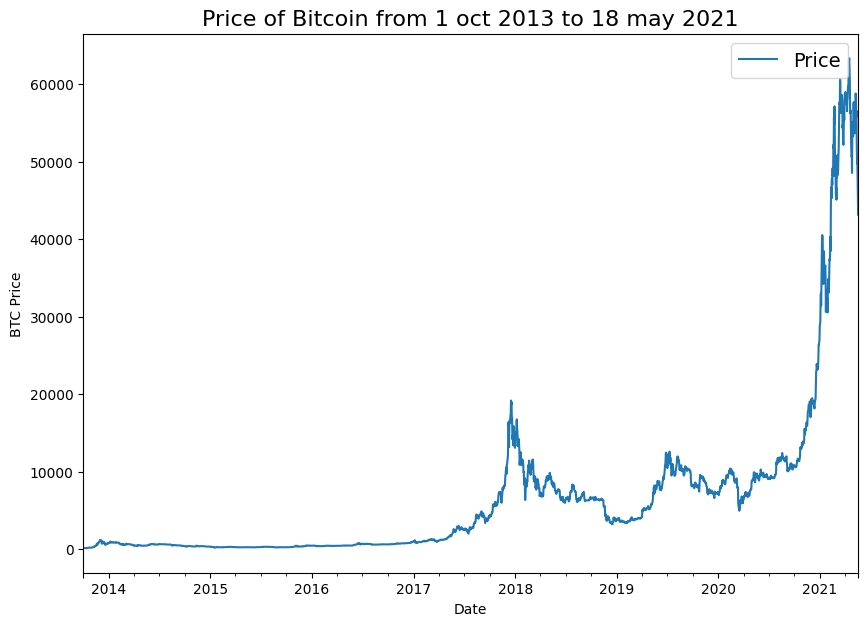

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

### Importing time series data with Python's CSV module


In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter= ",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as date (not string)
    btc_price.append(float(line[2])) # get the closing price as floa

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

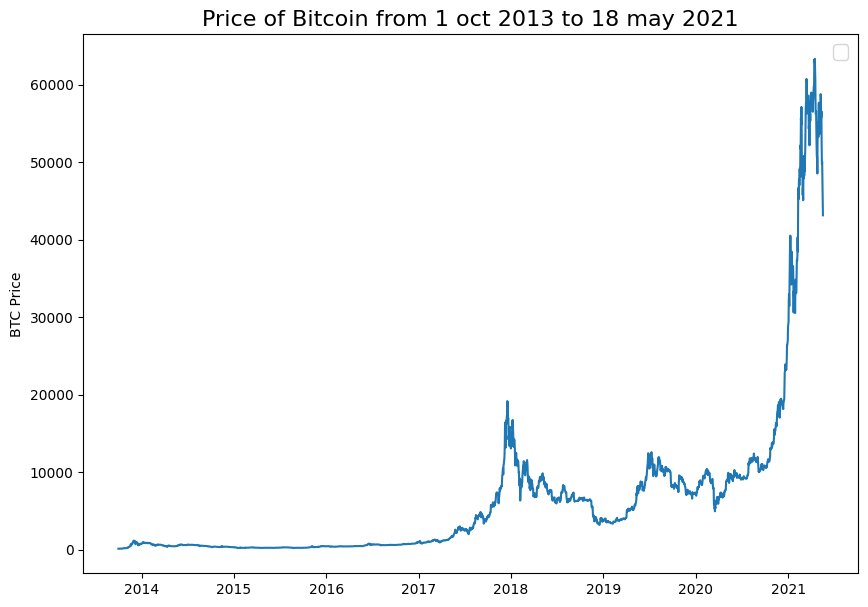

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

## Format data part1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the wrong way)

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

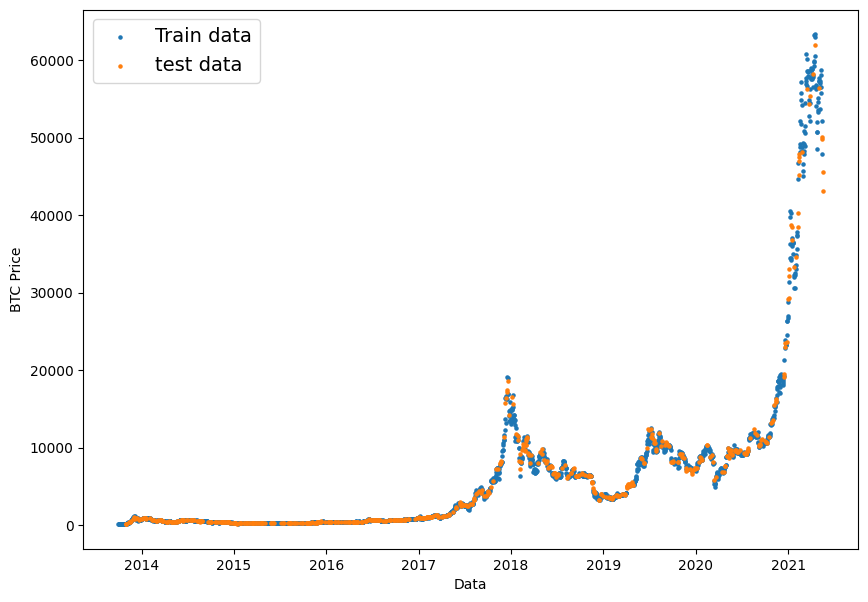

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [14]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test - you change these values as needed, e.g 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyind the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

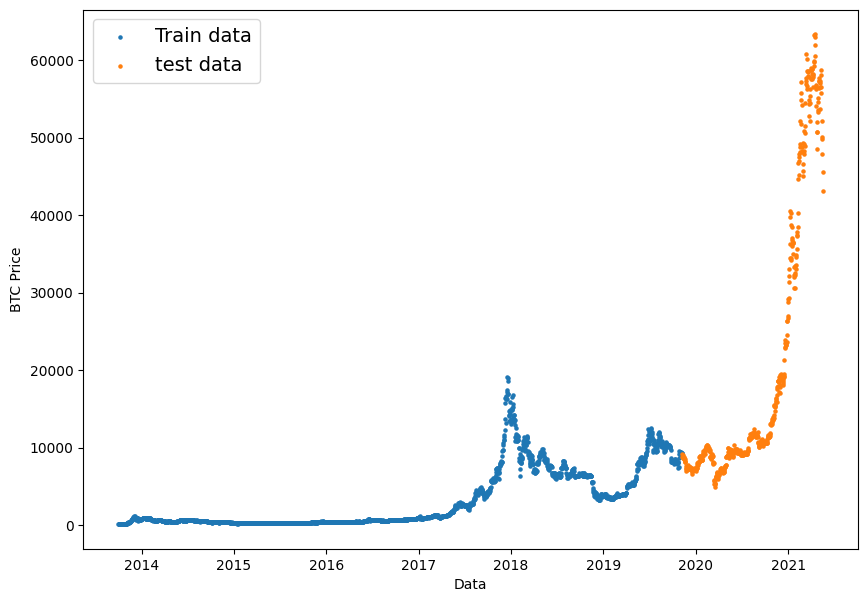

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [16]:
# Create the function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot correctly made splits
  """
  Plot timesteps (a series of points in time) against values (a series of values accros timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  #plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

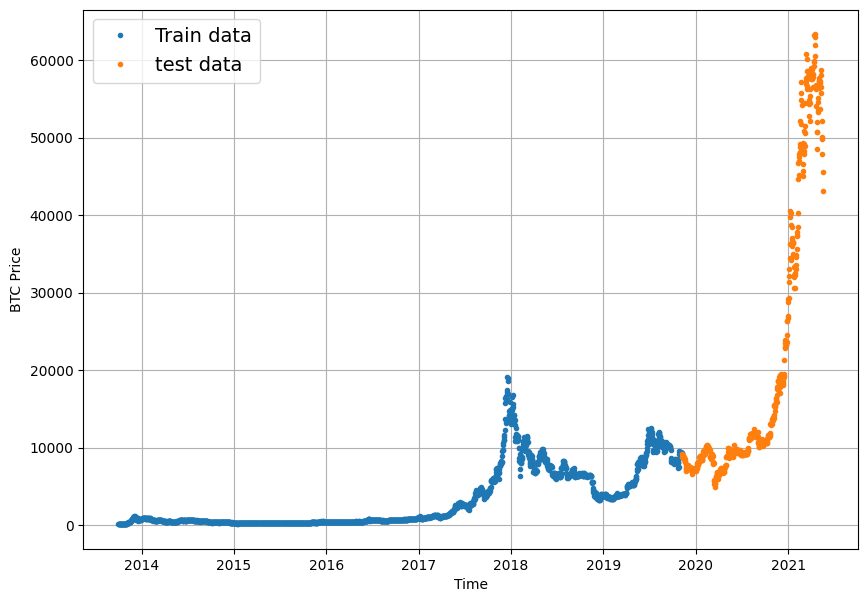

In [17]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")

## Modelling Experiments 

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with: 
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon  

Modelling experiments we're running:
 
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window =1
* 2	Same as 1, horizon = 1, window=	30
* 3	Same as 1, horizo1 = 7, window =	30
* 4	Conv1D	1	7
* 5	LSTM	1	7
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7
* 8	Ensemble (multiple models optimized on different loss functions)	1	7
* 9	Future prediction model (model to predict future values)	1	7	
* 10	Same as 1 (but with turkey 🦃 data introduced)	1	7

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [18]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

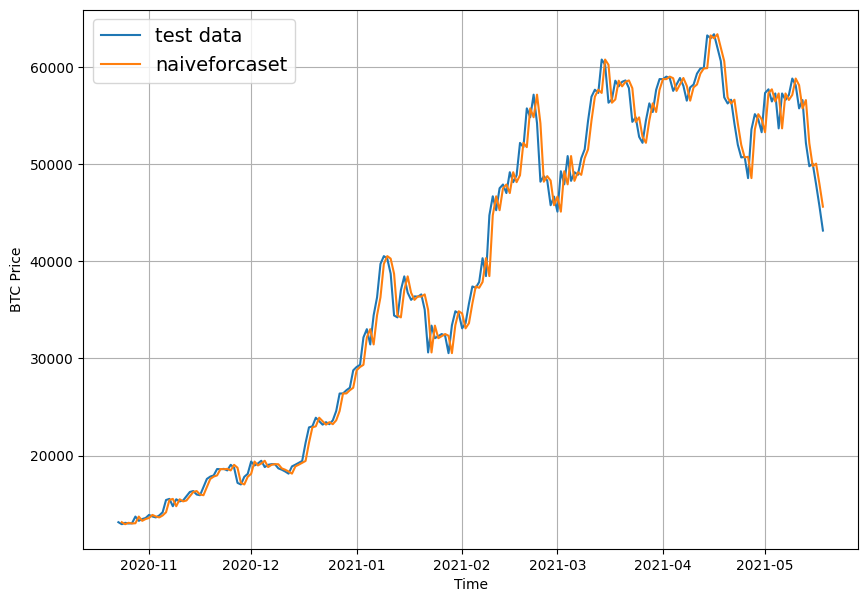

In [20]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, label="naiveforcaset", format="-")

> **Exercice:** Spend 10 minutes reading the simple forcasts chapter of Forcasting: Principles in Practice. ANd have a search to find out why the naive forcast is hard to beat, does the term autoregressive come up ?

## Evaluating a time series model 

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression like metrics.

A few common regression metrics (whhich can also be used for time series forecasting):
* MAE - mean absolute error.
* MSE - mean squared error.
* RMSE - root mean square error.
* MAPE/sMAPE - (symmetric) mean absolute percentage error.
* MASE - mean abslute scaled error.

For all of the above metrics, **lower is better** for example, for a model achieves an MAE of 0 that is better than an MAE of 100. 

The main thing we're evaluating here is : **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values) ?**

**Ressource: For a deeper dive on the various kinds of time series forecasting methode see Forecasting :[ Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)**
https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.performance_metrics.forecasting.mean_absolute_scaled_error.html?highlight=MASE%20output%20is%20on#sktime.performance_metrics.forecasting.mean_absolute_scaled_error

In [21]:
import tensorflow as tf 

In [22]:
# MASE implementation
# calculate the mean absolute scaled error
# calculate the mean absolute scaled error

# scale = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
# error = tf.reduce_mean(tf.abs(y_pred - y_true))
# mase = error / scale

In [23]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
     
  # Find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1))
     
  return mae / mae_naive_no_season

In [24]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [25]:
# Create a function to take in model predictions and truth values and return evaluation metrics

import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Vérifier si y_true et y_pred ont la même forme
    if len(y_true.shape) > 1 or len(y_pred.shape) > 1:
      # Aplatir y_true et y_pred s'ils ont des formes différentes
      y_true = tf.reshape(y_true, [-1])
      y_pred = tf.reshape(y_pred, [-1])

    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy()}

In [26]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [27]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [28]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [29]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However therer are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window ?

We window our time series dataset to turn oue data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [30]:
len(y_train)

2229

In [31]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]}  to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]  to predict this: 123.033


In [32]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [33]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()}-> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6]-> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0,1,2,3,4,5,6])

2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6],
[0,1,2,3,4,5,6]]
```
3. Use the 2D array of multiple window steps (from 2. ) to index on a target series (e.g. historical price of Bitcoin)
4. Use our `get_labelled_windows()` function we created above to rurn the window steps into the window steps into windows with a specified horizon.

> **Resource:** The function we're about to create has been adapted from the following article : https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [35]:
# Create function to view NumPy arrays as windows 

def make_windows(x, window_size= WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size 

  #print(f"Window indexes: \n{window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [37]:
# View the firs 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [38]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [39]:
prices[-1]

43144.4712908603

**Note:** You can find a function which achieves similar results to the ones we implemented above at [tf.keras.preprocessing.timeseries_dataset_from_array() ](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

In [40]:
#full_windows : c'est la separation du dataset sous forme listes de liste x c'est le nombre de windows pour ensuite determiné l horizon qui est windows +1, la valeur qui suit le window (ex 7 pour window et le 8eme  c'est l'horizon )

In [41]:
full_windows[1], full_labels[1]


(array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]),
 array([124.049]))

In [42]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [43]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [44]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [45]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [46]:
# check to see if train labels are the same (before and after window split )
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:]) 

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're goind to write a model checkpoint so we can compare apples to appeles.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example f our model performs the best on epoch 55 (but we're training for 100 epochs), we want to lead and evaluate the model saved on epoch 55. 

We can create a modelling checkpoint callback using this following : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 

In [47]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=os.path.join(save_path, model_name),
      verbose=0, # only output a limited amount of text
      #monitor='val_loss',  # monitor validation loss
      #mode='min',  # minimize validation loss
      save_best_only=True  # save only the best model
      )

## Model 1 : Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

*  **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves.
* **Parameters** = values a model learns on its own.

In [48]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it 

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1434.5504 - mae: 1434.5504 - mse: 6819535.5000

18/18 [==============================] - 6s 210ms/step - loss: 1434.5504 - mae: 1434.5504 - mse: 6819535.5000 - val_loss: 1672.0748 - val_mae: 1672.0748 - val_mse: 7730867.5000
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 350.8949 - mae: 350.8949 - mse: 480070.2500 - val_loss: 1889.0844 - val_mae: 1889.0844 - val_mse: 8473269.0000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 231.2614 - mae: 231.2614 - mse: 256072.9531

18/18 [==============================] - 2s 142ms/step - loss: 225.9073 - mae: 225.9073 - mse: 250533.5781 - val_loss: 1202.0302 - val_mae: 1202.0302 - val_mse: 4180238.2500
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 199.3276 - mae: 199.3276 - mse: 201405.8125

18/18 [==============================] - 3s 152ms/step - loss: 189.8654 - mae: 189.8654 - mse: 182639.8906 - val_loss: 1051.1200 - val_mae: 1051.1200 - val_mse: 3447723.0000
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 183.2325 - mae: 183.2325 - mse: 177995.7344

18/18 [==============================] - 1s 72ms/step - loss: 180.6219 - mae: 180.6219 - mse: 172444.2031 - val_loss: 982.6050 - val_mae: 982.6050 - val_mse: 3140858.5000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 175.2974 - mae: 175.2974 - mse: 159887.7031

18/18 [==============================] - 1s 66ms/step - loss: 175.2974 - mae: 175.2974 - mse: 159887.7031 - val_loss: 972.8249 - val_mae: 972.8249 - val_mse: 3160416.7500
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 170.8144 - mae: 170.8144 - mse: 154311.8594

18/18 [==============================] - 2s 103ms/step - loss: 166.1405 - mae: 166.1405 - mse: 146066.2812 - val_loss: 956.4102 - val_mae: 956.4102 - val_mse: 2787994.7500
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 158.5189 - mae: 158.5189 - mse: 134182.1875

18/18 [==============================] - 2s 106ms/step - loss: 158.5189 - mae: 158.5189 - mse: 134182.1875 - val_loss: 858.4501 - val_mae: 858.4501 - val_mse: 2476725.2500
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 156.3681 - mae: 156.3681 - mse: 130289.2344 - val_loss: 891.4105 - val_mae: 891.4105 - val_mse: 2431653.2500
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 148.1080 - mae: 148.1080 - mse: 121411.0469

18/18 [==============================] - 1s 71ms/step - loss: 149.5515 - mae: 149.5515 - mse: 122611.5391 - val_loss: 826.0338 - val_mae: 826.0338 - val_mse: 2185590.2500
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 149.7959 - mae: 149.7959 - mse: 123152.2969

18/18 [==============================] - 1s 85ms/step - loss: 144.3976 - mae: 144.3976 - mse: 112791.7656 - val_loss: 792.8391 - val_mae: 792.8391 - val_mse: 2034904.1250
Epoch 12/100
18/18 [==============================] - 0s 12ms/step - loss: 139.2393 - mae: 139.2393 - mse: 107652.4688 - val_loss: 871.6616 - val_mae: 871.6616 - val_mse: 2200069.5000
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 138.1246 - mae: 138.1246 - mse: 106997.6953 - val_loss: 809.1636 - val_mae: 809.1636 - val_mse: 1975229.0000
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 130.7088 - mae: 130.7088 - mse: 94750.6797 

18/18 [==============================] - 2s 122ms/step - loss: 133.4163 - mae: 133.4163 - mse: 99327.5000 - val_loss: 757.3448 - val_mae: 757.3448 - val_mse: 1795205.1250
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 131.5792 - mae: 131.5792 - mse: 96094.1250

18/18 [==============================] - 2s 138ms/step - loss: 131.5792 - mae: 131.5792 - mse: 96094.1250 - val_loss: 741.9341 - val_mae: 741.9341 - val_mse: 1723463.1250
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 125.1320 - mae: 125.1320 - mse: 87880.2344

18/18 [==============================] - 1s 78ms/step - loss: 127.1081 - mae: 127.1081 - mse: 92118.9375 - val_loss: 717.3262 - val_mae: 717.3262 - val_mse: 1636921.5000
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 125.6705 - mae: 125.6705 - mse: 89575.6562 - val_loss: 779.8343 - val_mae: 779.8343 - val_mse: 1791479.6250
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 126.2130 - mae: 126.2130 - mse: 91060.7734 - val_loss: 739.9886 - val_mae: 739.9886 - val_mse: 1660209.5000
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 122.9959 - mae: 122.9959 - mse: 86365.1562 - val_loss: 768.3128 - val_mae: 768.3128 - val_mse: 1738079.6250
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 136.8978 - mae: 136.8978 - mse: 90671.9375

18/18 [==============================] - 1s 38ms/step - loss: 121.2777 - mae: 121.2777 - mse: 84580.7656 - val_loss: 654.3730 - val_mae: 654.3730 - val_mse: 1432156.1250
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5188 - mae: 135.5188 - mse: 82494.6562

18/18 [==============================] - 1s 38ms/step - loss: 121.4950 - mae: 121.4950 - mse: 85817.5859 - val_loss: 650.3763 - val_mae: 650.3763 - val_mse: 1408012.7500
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 119.5457 - mae: 119.5457 - mse: 83101.2500 - val_loss: 673.9527 - val_mae: 673.9527 - val_mse: 1449400.6250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4012 - mae: 126.4012 - mse: 68286.4844

18/18 [==============================] - 1s 37ms/step - loss: 120.5653 - mae: 120.5653 - mse: 82943.0469 - val_loss: 641.4155 - val_mae: 641.4155 - val_mse: 1372192.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9174 - mae: 128.9174 - mse: 84676.4453

18/18 [==============================] - 1s 37ms/step - loss: 116.7850 - mae: 116.7850 - mse: 80690.0781 - val_loss: 632.2288 - val_mae: 632.2288 - val_mse: 1349949.0000
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 116.9826 - mae: 116.9826 - mse: 80207.4688 - val_loss: 633.2612 - val_mae: 633.2612 - val_mse: 1345481.3750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2070 - mae: 114.2070 - mse: 55847.9297

18/18 [==============================] - 1s 37ms/step - loss: 115.4894 - mae: 115.4894 - mse: 78162.6562 - val_loss: 620.9799 - val_mae: 620.9799 - val_mse: 1320384.8750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 161.8530 - mae: 161.8530 - mse: 135260.4688

18/18 [==============================] - 1s 36ms/step - loss: 115.9315 - mae: 115.9315 - mse: 78482.5000 - val_loss: 617.7336 - val_mae: 617.7336 - val_mse: 1304665.2500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2783 - mae: 103.2783 - mse: 64160.7773

18/18 [==============================] - 1s 37ms/step - loss: 113.7398 - mae: 113.7398 - mse: 76501.4531 - val_loss: 614.8244 - val_mae: 614.8244 - val_mse: 1294815.3750
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3271 - mae: 113.3271 - mse: 77089.1328 - val_loss: 621.8285 - val_mae: 621.8285 - val_mse: 1302614.0000
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 117.0271 - mae: 117.0271 - mse: 66332.9531

18/18 [==============================] - 1s 38ms/step - loss: 116.5658 - mae: 116.5658 - mse: 78265.3047 - val_loss: 609.8421 - val_mae: 609.8421 - val_mse: 1289355.2500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3424 - mae: 112.3424 - mse: 74563.3750 - val_loss: 648.7391 - val_mae: 648.7391 - val_mse: 1358020.1250
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2505 - mae: 112.2505 - mse: 75921.8125 - val_loss: 609.9310 - val_mae: 609.9310 - val_mse: 1269153.6250
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0220 - mae: 112.0220 - mse: 74694.0703 - val_loss: 652.5217 - val_mae: 652.5217 - val_mse: 1364048.7500
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0364 - mae: 112.0364 - mse: 75676.8359 - val_loss: 612.2789 - val_mae: 612.2789 - val_mse: 1294817.3750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0482 - mae: 112.0482 - m

18/18 [==============================] - 1s 40ms/step - loss: 122.2789 - mae: 122.2789 - mse: 79673.5000 - val_loss: 607.0955 - val_mae: 607.0955 - val_mse: 1255559.6250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1766 - mae: 142.1766 - mse: 126618.8125

18/18 [==============================] - 1s 43ms/step - loss: 113.5246 - mae: 113.5246 - mse: 76459.8906 - val_loss: 600.4130 - val_mae: 600.4130 - val_mse: 1239745.3750
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5736 - mae: 113.5736 - mse: 74415.9531 - val_loss: 603.6223 - val_mae: 603.6223 - val_mse: 1266491.0000
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 119.2244 - mae: 119.2244 - mse: 100606.9375

18/18 [==============================] - 1s 73ms/step - loss: 111.2954 - mae: 111.2954 - mse: 73547.7031 - val_loss: 594.4162 - val_mae: 594.4162 - val_mse: 1225461.0000
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4870 - mae: 110.4870 - mse: 72164.1172 - val_loss: 624.4247 - val_mae: 624.4247 - val_mse: 1316262.1250
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0710 - mae: 111.0710 - mse: 72482.5859 - val_loss: 596.2290 - val_mae: 596.2290 - val_mse: 1244229.3750
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6049 - mae: 113.6049 - mse: 75922.9453 - val_loss: 616.6808 - val_mae: 616.6808 - val_mse: 1269631.2500
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4588 - mae: 113.4588 - mse: 72400.2422 - val_loss: 637.1658 - val_mae: 637.1658 - val_mse: 1344914.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6455 - mae: 115.6455 - m

18/18 [==============================] - 1s 50ms/step - loss: 109.3572 - mae: 109.3572 - mse: 72621.2266 - val_loss: 583.3662 - val_mae: 583.3662 - val_mse: 1196807.8750
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6804 - mae: 110.6804 - mse: 73180.5312 - val_loss: 628.8452 - val_mae: 628.8452 - val_mse: 1290691.0000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 115.6880 - mae: 115.6880 - mse: 74640.2812 - val_loss: 585.0025 - val_mae: 585.0025 - val_mse: 1210793.5000
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1155 - mae: 110.1155 - mse: 72569.9062 - val_loss: 612.0883 - val_mae: 612.0883 - val_mse: 1250496.2500
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6015 - mae: 114.6015 - mse: 76282.4766 - val_loss: 586.7083 - val_mae: 586.7083 - val_mse: 1218112.7500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7105 - mae: 112.7105 - m

18/18 [==============================] - 1s 38ms/step - loss: 111.3202 - mae: 111.3202 - mse: 72158.4062 - val_loss: 581.0200 - val_mae: 581.0200 - val_mse: 1188728.8750
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 125.5598 - mae: 125.5598 - mse: 94051.8984

18/18 [==============================] - 1s 36ms/step - loss: 110.0116 - mae: 110.0116 - mse: 73288.1484 - val_loss: 579.5710 - val_mae: 579.5710 - val_mse: 1186268.3750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9674 - mae: 109.9674 - mse: 72020.5469 - val_loss: 772.8115 - val_mae: 772.8115 - val_mse: 1746751.1250
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6928 - mae: 126.6928 - mse: 84130.3594 - val_loss: 728.4471 - val_mae: 728.4471 - val_mse: 1601113.5000
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1370 - mae: 116.1370 - mse: 74282.0938 - val_loss: 601.5082 - val_mae: 601.5082 - val_mse: 1255215.2500
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4020 - mae: 109.4020 - mse: 71634.1797 - val_loss: 580.1927 - val_mae: 580.1927 - val_mse: 1192794.8750
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2021 - mae: 108.2021 - m

18/18 [==============================] - 1s 36ms/step - loss: 108.0401 - mae: 108.0401 - mse: 70442.0078 - val_loss: 575.5108 - val_mae: 575.5108 - val_mse: 1178642.5000
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 71.0729 - mae: 71.0729 - mse: 32190.2871

18/18 [==============================] - 1s 36ms/step - loss: 107.0929 - mae: 107.0929 - mse: 68991.6562 - val_loss: 574.1193 - val_mae: 574.1193 - val_mse: 1175096.8750
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6355 - mae: 109.6355 - mse: 70937.5000 - val_loss: 618.1958 - val_mae: 618.1958 - val_mse: 1259721.2500
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2345 - mae: 109.2345 - mse: 70995.2500 - val_loss: 587.2034 - val_mae: 587.2034 - val_mse: 1194187.8750
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1923 - mae: 108.1923 - mse: 71012.4219 - val_loss: 581.7015 - val_mae: 581.7015 - val_mse: 1182732.2500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4048 - mae: 114.4048 - mse: 71719.1172

18/18 [==============================] - 1s 38ms/step - loss: 107.8639 - mae: 107.8639 - mse: 69998.7422 - val_loss: 571.9093 - val_mae: 571.9093 - val_mse: 1170402.7500
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5322 - mae: 106.5322 - mse: 69442.1328 - val_loss: 628.8867 - val_mae: 628.8867 - val_mse: 1311299.5000
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7203 - mae: 112.7203 - mse: 69226.6875 - val_loss: 671.1060 - val_mae: 671.1060 - val_mse: 1423469.6250
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 121.9787 - mae: 121.9787 - mse: 79011.8984 - val_loss: 605.6437 - val_mae: 605.6437 - val_mse: 1258734.6250
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 128.1338 - mae: 128.1338 - mse: 84479.4297 - val_loss: 580.6402 - val_mae: 580.6402 - val_mse: 1202130.1250
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3045 - mae: 112.3045 - m

18/18 [==============================] - 1s 38ms/step - loss: 107.9894 - mae: 107.9894 - mse: 70673.8594 - val_loss: 571.3146 - val_mae: 571.3146 - val_mse: 1174299.3750
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4253 - mae: 110.4253 - mse: 71494.7188 - val_loss: 612.3524 - val_mae: 612.3524 - val_mse: 1270508.2500
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 106.4690 - mae: 106.4690 - mse: 70051.8750 - val_loss: 571.8553 - val_mae: 571.8553 - val_mse: 1165821.0000
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3918 - mae: 108.3918 - mse: 69300.7656 - val_loss: 576.9611 - val_mae: 576.9611 - val_mse: 1171969.5000
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3046 - mae: 111.3046 - mse: 71911.5781 - val_loss: 594.0743 - val_mae: 594.0743 - val_mse: 1229253.5000
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.8842 - mae: 83.8842 - mse: 64

18/18 [==============================] - 1s 35ms/step - loss: 107.8167 - mae: 107.8167 - mse: 69758.5703 - val_loss: 570.9913 - val_mae: 570.9913 - val_mse: 1168920.3750
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 104.1478 - mae: 104.1478 - mse: 48770.2812

18/18 [==============================] - 1s 38ms/step - loss: 109.1822 - mae: 109.1822 - mse: 70026.0391 - val_loss: 569.6523 - val_mae: 569.6523 - val_mse: 1168942.6250
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7780 - mae: 106.7780 - mse: 70516.8281 - val_loss: 594.4002 - val_mae: 594.4002 - val_mse: 1226600.0000
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8572 - mae: 108.8572 - mse: 71376.9922 - val_loss: 601.4604 - val_mae: 601.4604 - val_mse: 1217936.7500
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 99.5857 - mae: 99.5857 - mse: 46827.7383

18/18 [==============================] - 1s 36ms/step - loss: 106.3287 - mae: 106.3287 - mse: 69343.6719 - val_loss: 567.7191 - val_mae: 567.7191 - val_mse: 1160958.3750
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6906 - mae: 113.6906 - mse: 74839.8203 - val_loss: 570.7427 - val_mae: 570.7427 - val_mse: 1159647.3750
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0803 - mae: 113.0803 - mse: 73381.7266 - val_loss: 631.0024 - val_mae: 631.0024 - val_mse: 1307270.5000
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7938 - mae: 110.7938 - mse: 71573.4453 - val_loss: 577.0862 - val_mae: 577.0862 - val_mse: 1187295.2500
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7983 - mae: 106.7983 - mse: 69804.0156 - val_loss: 585.6882 - val_mae: 585.6882 - val_mse: 1184041.8750
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1419 - mae: 108.1419 - m

18/18 [==============================] - 1s 38ms/step - loss: 109.6655 - mae: 109.6655 - mse: 70700.7656 - val_loss: 567.6436 - val_mae: 567.6436 - val_mse: 1162005.0000
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2645 - mae: 114.2645 - mse: 73410.2656 - val_loss: 645.4523 - val_mae: 645.4523 - val_mse: 1343960.6250
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6638 - mae: 109.6638 - mse: 71403.2422 - val_loss: 592.4922 - val_mae: 592.4922 - val_mse: 1196006.6250
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 139.8211 - mae: 139.8211 - mse: 113714.8125

18/18 [==============================] - 1s 46ms/step - loss: 105.6491 - mae: 105.6491 - mse: 67239.0391 - val_loss: 567.0436 - val_mae: 567.0436 - val_mse: 1156758.5000
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9869 - mae: 108.9869 - mse: 69412.3359 - val_loss: 607.7580 - val_mae: 607.7580 - val_mse: 1254984.3750
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4787 - mae: 107.4787 - mse: 70111.1016 - val_loss: 598.2503 - val_mae: 598.2503 - val_mse: 1209061.0000
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2818 - mae: 107.2818 - mse: 69497.1562 - val_loss: 588.7291 - val_mae: 588.7291 - val_mse: 1214695.8750
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6034 - mae: 106.6034 - mse: 69556.4609 - val_loss: 570.1116 - val_mae: 570.1116 - val_mse: 1158678.7500
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3341 - mae: 112.3341 - 

In [49]:
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [50]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 689.1575 - mae: 689.1575 - mse: 1416956.3750


[689.157470703125, 689.157470703125, 1416956.375]

In [51]:
# Load in saved performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.0436 - mae: 567.0436 - mse: 1156758.5000


[567.0436401367188, 567.0436401367188, 1156758.5]

In [52]:
 naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecssts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()`
4. Returns the predictions.
 


In [53]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [54]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8815.618, 8752.7  , 9009.082, 8753.596, 8743.359, 8733.669,
        8621.303, 8508.305, 8440.473, 8494.833], dtype=float32)>)

In [55]:
model_1_preds.shape, tf.squeeze(test_labels).shape

(TensorShape([556]), TensorShape([556]))

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 567.04364,
 'mape': 2.551451,
 'mase': 0.99613863,
 'mse': 1156758.4,
 'rmse': 1075.527}

## Model 2 : Dense (window = 30, horizon = 1)

In [57]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past 

In [58]:
# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [59]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [60]:
train_windows[0], train_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [61]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_2") # name our model so we can save it 

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 2643.0083 - mae: 2643.0083 - mse: 17484926.0000

18/18 [==============================] - 2s 69ms/step - loss: 968.8969 - mae: 968.8969 - mse: 3925823.7500 - val_loss: 4587.8608 - val_mae: 4587.8608 - val_mse: 42926044.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 666.1182 - mae: 666.1182 - mse: 1556754.7500

18/18 [==============================] - 1s 37ms/step - loss: 419.3685 - mae: 419.3685 - mse: 742440.1875 - val_loss: 1609.2070 - val_mae: 1609.2070 - val_mse: 7940557.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 299.9238 - mae: 299.9238 - mse: 584936.6875

18/18 [==============================] - 1s 36ms/step - loss: 287.8330 - mae: 287.8330 - mse: 395885.1562 - val_loss: 1316.9846 - val_mae: 1316.9846 - val_mse: 5441036.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5729 - mae: 201.5729 - mse: 242335.0000

18/18 [==============================] - 1s 38ms/step - loss: 240.1118 - mae: 240.1118 - mse: 277820.0938 - val_loss: 1259.9312 - val_mae: 1259.9312 - val_mse: 4748524.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 195.9596 - mae: 195.9596 - mse: 145271.1875

18/18 [==============================] - 1s 37ms/step - loss: 210.7388 - mae: 210.7388 - mse: 219640.7344 - val_loss: 1109.8218 - val_mae: 1109.8218 - val_mse: 3809770.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 269.8990 - mae: 269.8990 - mse: 455806.8125

18/18 [==============================] - 1s 36ms/step - loss: 201.5559 - mae: 201.5559 - mse: 199955.5625 - val_loss: 1031.1868 - val_mae: 1031.1868 - val_mse: 3389962.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 178.3257 - mae: 178.3257 - mse: 214622.8125

18/18 [==============================] - 1s 37ms/step - loss: 184.3892 - mae: 184.3892 - mse: 175019.5312 - val_loss: 982.8649 - val_mae: 982.8649 - val_mse: 3144761.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 175.2706 - mae: 175.2706 - mse: 153289.1094

18/18 [==============================] - 1s 36ms/step - loss: 173.6725 - mae: 173.6725 - mse: 154790.9219 - val_loss: 945.7692 - val_mae: 945.7692 - val_mse: 2797199.7500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 165.6481 - mae: 165.6481 - mse: 146240.7500 - val_loss: 976.9683 - val_mae: 976.9683 - val_mse: 2788884.7500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 187.9254 - mae: 187.9254 - mse: 181341.7500

18/18 [==============================] - 1s 38ms/step - loss: 157.8134 - mae: 157.8134 - mse: 131668.0312 - val_loss: 857.3265 - val_mae: 857.3265 - val_mse: 2387696.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 166.4836 - mae: 166.4836 - mse: 147556.0000

18/18 [==============================] - 1s 39ms/step - loss: 150.3706 - mae: 150.3706 - mse: 123449.0469 - val_loss: 834.8038 - val_mae: 834.8038 - val_mse: 2270856.7500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 154.8504 - mae: 154.8504 - mse: 123930.8047 - val_loss: 846.6813 - val_mae: 846.6813 - val_mse: 2219845.5000
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 147.8433 - mae: 147.8433 - mse: 116248.7109 - val_loss: 893.5059 - val_mae: 893.5059 - val_mse: 2567914.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 208.3898 - mae: 208.3898 - mse: 239032.5000

18/18 [==============================] - 1s 39ms/step - loss: 156.5222 - mae: 156.5222 - mse: 122577.1250 - val_loss: 819.4855 - val_mae: 819.4855 - val_mse: 2081614.8750
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 165.1750 - mae: 165.1750 - mse: 129272.0938 - val_loss: 1104.8845 - val_mae: 1104.8845 - val_mse: 3619098.7500
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 171.6949 - mae: 171.6949 - mse: 138955.7344 - val_loss: 1004.2270 - val_mae: 1004.2270 - val_mse: 3086995.7500
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 149.4682 - mae: 149.4682 - mse: 115737.4297 - val_loss: 1067.6193 - val_mae: 1067.6193 - val_mse: 2946043.7500
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 146.6629 - mae: 146.6629 - mse: 111647.0312 - val_loss: 850.0333 - val_mae: 850.0333 - val_mse: 2114960.7500
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 142.1387 - mae: 1

18/18 [==============================] - 1s 54ms/step - loss: 164.3237 - mae: 164.3237 - mse: 127202.5703 - val_loss: 796.9943 - val_mae: 796.9943 - val_mse: 2058647.6250
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 137.7180 - mae: 137.7180 - mse: 101566.4531

18/18 [==============================] - 1s 55ms/step - loss: 136.3432 - mae: 136.3432 - mse: 99864.4297 - val_loss: 756.0492 - val_mae: 756.0492 - val_mse: 1802217.5000
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 143.3507 - mae: 143.3507 - mse: 106224.2656 - val_loss: 1037.3319 - val_mae: 1037.3319 - val_mse: 2774616.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 192.6282 - mae: 192.6282 - mse: 131222.4219

18/18 [==============================] - 1s 39ms/step - loss: 145.0745 - mae: 145.0745 - mse: 105098.9062 - val_loss: 730.3317 - val_mae: 730.3317 - val_mse: 1729503.7500
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 131.9777 - mae: 131.9777 - mse: 96284.0703 - val_loss: 740.0225 - val_mae: 740.0225 - val_mse: 1736212.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 137.1880 - mae: 137.1880 - mse: 96281.5938 - val_loss: 912.6378 - val_mae: 912.6378 - val_mse: 2540160.0000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 154.5968 - mae: 154.5968 - mse: 112653.0703 - val_loss: 745.0354 - val_mae: 745.0354 - val_mse: 1739175.6250
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 135.6820 - mae: 135.6820 - mse: 99771.2031 - val_loss: 883.5601 - val_mae: 883.5601 - val_mse: 2399318.7500
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 207.4354 - mae: 207.4354 - mse

18/18 [==============================] - 1s 43ms/step - loss: 149.1141 - mae: 149.1141 - mse: 111375.3203 - val_loss: 710.8832 - val_mae: 710.8832 - val_mse: 1663289.3750
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 139.2900 - mae: 139.2900 - mse: 101438.7812 - val_loss: 1003.7280 - val_mae: 1003.7280 - val_mse: 2624400.2500
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 148.8914 - mae: 148.8914 - mse: 106436.0469 - val_loss: 712.0153 - val_mae: 712.0153 - val_mse: 1687137.6250
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 133.0535 - mae: 133.0535 - mse: 94524.5547 - val_loss: 865.4874 - val_mae: 865.4874 - val_mse: 2090771.0000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 159.1343 - mae: 159.1343 - mse: 88910.3281

18/18 [==============================] - 1s 38ms/step - loss: 134.3077 - mae: 134.3077 - mse: 95595.5781 - val_loss: 705.7650 - val_mae: 705.7650 - val_mse: 1604187.3750
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 129.9059 - mae: 129.9059 - mse: 93568.2656 - val_loss: 767.6064 - val_mae: 767.6064 - val_mse: 1900487.3750
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 139.9107 - mae: 139.9107 - mse: 99748.6953 - val_loss: 954.1707 - val_mae: 954.1707 - val_mse: 2670073.5000
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0050 - mae: 157.0050 - mse: 78574.5781

18/18 [==============================] - 1s 57ms/step - loss: 142.5610 - mae: 142.5610 - mse: 97811.5234 - val_loss: 694.5503 - val_mae: 694.5503 - val_mse: 1585162.8750
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 137.0731 - mae: 137.0731 - mse: 100352.8828 - val_loss: 726.6719 - val_mae: 726.6719 - val_mse: 1621402.3750
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 141.8225 - mae: 141.8225 - mse: 100222.7188 - val_loss: 758.7791 - val_mae: 758.7791 - val_mse: 1726299.3750
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 129.3907 - mae: 129.3907 - mse: 93104.7969 - val_loss: 736.5656 - val_mae: 736.5656 - val_mse: 1652380.7500
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 98.0487 - mae: 98.0487 - mse: 40554.8594

18/18 [==============================] - 1s 39ms/step - loss: 130.8392 - mae: 130.8392 - mse: 88218.7422 - val_loss: 691.1166 - val_mae: 691.1166 - val_mse: 1612340.7500
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 126.1453 - mae: 126.1453 - mse: 88930.5234 - val_loss: 772.2263 - val_mae: 772.2263 - val_mse: 1770258.8750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4570 - mae: 131.4570 - mse: 66542.4297

18/18 [==============================] - 1s 38ms/step - loss: 132.9769 - mae: 132.9769 - mse: 93264.3438 - val_loss: 682.1099 - val_mae: 682.1099 - val_mse: 1556160.0000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 133.4992 - mae: 133.4992 - mse: 93129.3594 - val_loss: 949.8602 - val_mae: 949.8602 - val_mse: 2621164.5000
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 128.8589 - mae: 128.8589 - mse: 91593.4766 - val_loss: 696.9376 - val_mae: 696.9376 - val_mse: 1646344.3750
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0049 - mae: 142.0049 - mse: 86858.2266

18/18 [==============================] - 1s 37ms/step - loss: 124.1383 - mae: 124.1383 - mse: 87691.0312 - val_loss: 678.4773 - val_mae: 678.4773 - val_mse: 1504866.1250
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 124.8581 - mae: 124.8581 - mse: 87994.9531 - val_loss: 693.9883 - val_mae: 693.9883 - val_mse: 1624749.0000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2825 - mae: 127.2825 - mse: 92793.4531 - val_loss: 726.1533 - val_mae: 726.1533 - val_mse: 1612570.1250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 128.0686 - mae: 128.0686 - mse: 88591.6406 - val_loss: 856.9237 - val_mae: 856.9237 - val_mse: 2229543.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2064 - mae: 139.2064 - mse: 94366.8828 - val_loss: 738.3685 - val_mae: 738.3685 - val_mse: 1777568.6250
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 148.5388 - mae: 148.5388 - m

18/18 [==============================] - 1s 38ms/step - loss: 149.0611 - mae: 149.0611 - mse: 108855.1562 - val_loss: 667.7681 - val_mae: 667.7681 - val_mse: 1470368.5000
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 138.0078 - mae: 138.0078 - mse: 96487.5781 - val_loss: 1126.1871 - val_mae: 1126.1871 - val_mse: 3050759.5000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 157.9452 - mae: 157.9452 - mse: 111200.7422 - val_loss: 676.7720 - val_mae: 676.7720 - val_mse: 1450880.8750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 140.3877 - mae: 140.3877 - mse: 97217.8281 - val_loss: 686.1136 - val_mae: 686.1136 - val_mse: 1492800.8750
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 127.4035 - mae: 127.4035 - mse: 88348.2031 - val_loss: 741.5787 - val_mae: 741.5787 - val_mse: 1645878.0000
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 127.7922 - mae: 127.7922

18/18 [==============================] - 1s 38ms/step - loss: 118.7548 - mae: 118.7548 - mse: 81461.2422 - val_loss: 642.8447 - val_mae: 642.8447 - val_mse: 1416321.8750
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 125.1663 - mae: 125.1663 - mse: 86530.8594 - val_loss: 686.0134 - val_mae: 686.0134 - val_mse: 1486296.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9140 - mae: 117.9140 - mse: 80581.8984 - val_loss: 759.2692 - val_mae: 759.2692 - val_mse: 1683479.2500
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2227 - mae: 122.2227 - mse: 84119.6797 - val_loss: 897.7339 - val_mae: 897.7339 - val_mse: 2137359.0000
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 152.9926 - mae: 152.9926 - mse: 82384.7969

18/18 [==============================] - 1s 84ms/step - loss: 126.4140 - mae: 126.4140 - mse: 86831.4219 - val_loss: 640.7975 - val_mae: 640.7975 - val_mse: 1366656.0000
Epoch 72/100
18/18 [==============================] - 1s 33ms/step - loss: 120.3984 - mae: 120.3984 - mse: 81139.8438 - val_loss: 654.2872 - val_mae: 654.2872 - val_mse: 1457323.3750
Epoch 73/100
18/18 [==============================] - 0s 26ms/step - loss: 120.2629 - mae: 120.2629 - mse: 82784.3750 - val_loss: 661.0996 - val_mae: 661.0996 - val_mse: 1397181.2500
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 121.7980 - mae: 121.7980 - mse: 82879.1172 - val_loss: 682.4060 - val_mae: 682.4060 - val_mse: 1535721.1250
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 131.1871 - mae: 131.1871 - mse: 87703.5547 - val_loss: 677.4139 - val_mae: 677.4139 - val_mse: 1509517.0000
Epoch 76/100
18/18 [==============================] - 1s 28ms/step - loss: 128.2556 - mae: 128.2556 

18/18 [==============================] - 1s 72ms/step - loss: 130.8409 - mae: 130.8409 - mse: 89138.5469 - val_loss: 632.6383 - val_mae: 632.6383 - val_mse: 1376319.7500
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 122.3633 - mae: 122.3633 - mse: 82983.5469 - val_loss: 743.3754 - val_mae: 743.3754 - val_mse: 1643960.7500
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 126.4650 - mae: 126.4650 - mse: 84199.1562 - val_loss: 910.1686 - val_mae: 910.1686 - val_mse: 2188294.2500
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 136.9989 - mae: 136.9989 - mse: 90742.1484 - val_loss: 1087.0361 - val_mae: 1087.0361 - val_mse: 2826027.2500
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 149.0979 - mae: 149.0979 - mse: 100234.2656 - val_loss: 817.2417 - val_mae: 817.2417 - val_mse: 1979279.2500
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 123.2220 - mae: 123.2220

18/18 [==============================] - 1s 36ms/step - loss: 126.2713 - mae: 126.2713 - mse: 82812.7578 - val_loss: 624.6700 - val_mae: 624.6700 - val_mse: 1307439.2500
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 123.8080 - mae: 123.8080 - mse: 81467.6094 - val_loss: 644.5435 - val_mae: 644.5435 - val_mse: 1399580.0000
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1682 - mae: 121.1682 - mse: 80650.2266 - val_loss: 659.4908 - val_mae: 659.4908 - val_mse: 1386135.0000
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 122.2144 - mae: 122.2144 - mse: 81628.5625 - val_loss: 680.8972 - val_mae: 680.8972 - val_mse: 1447550.8750
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4743 - mae: 114.4743 - mse: 63389.8477

18/18 [==============================] - 1s 36ms/step - loss: 116.6800 - mae: 116.6800 - mse: 78089.5312 - val_loss: 620.3424 - val_mae: 620.3424 - val_mse: 1318183.0000
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1939 - mae: 114.1939 - mse: 77347.8203 - val_loss: 638.7077 - val_mae: 638.7077 - val_mse: 1382706.3750
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 121.9093 - mae: 121.9093 - mse: 82970.8984 - val_loss: 620.5904 - val_mae: 620.5904 - val_mse: 1299285.6250
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 135.9018 - mae: 135.9018 - mse: 93685.4609 - val_loss: 830.8986 - val_mae: 830.8986 - val_mse: 1906463.8750
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 141.8377 - mae: 141.8377 - mse: 94033.2578 - val_loss: 677.0523 - val_mae: 677.0523 - val_mse: 1446201.1250
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 121.9140 - mae: 121.9140 - m

18/18 [==============================] - 1s 37ms/step - loss: 120.1434 - mae: 120.1434 - mse: 78410.4609 - val_loss: 620.1526 - val_mae: 620.1526 - val_mse: 1294715.1250
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 118.8776 - mae: 118.8776 - mse: 80543.2109 - val_loss: 651.3179 - val_mae: 651.3179 - val_mse: 1366037.3750
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 116.7269 - mae: 116.7269 - mse: 75112.5625 - val_loss: 669.5750 - val_mae: 669.5750 - val_mse: 1454611.6250


In [62]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 669.5750 - mae: 669.5750 - mse: 1454611.6250


[669.5750122070312, 669.5750122070312, 1454611.625]

In [63]:
mmodel_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 669.5750 - mae: 669.5750 - mse: 1454611.6250


[669.5750122070312, 669.5750122070312, 1454611.625]

In [64]:
model_2_preds = make_preds(model_2,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [65]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [66]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'mae': 669.57495,
 'mape': 3.1655393,
 'mase': 1.1704235,
 'mse': 1454611.5,
 'rmse': 1206.0728}

In [67]:
model_1_results

{'mae': 567.04364,
 'mape': 2.551451,
 'mase': 0.99613863,
 'mse': 1156758.4,
 'rmse': 1075.527}

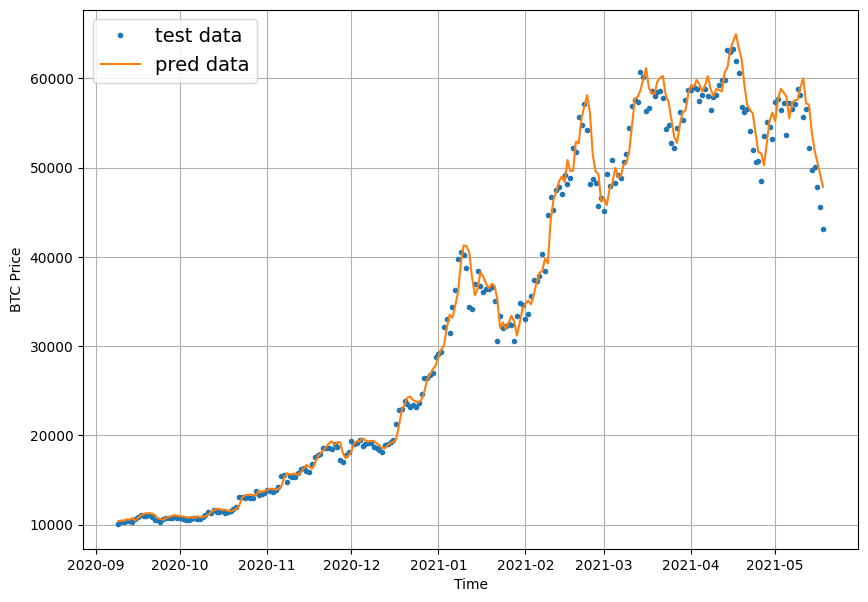

In [68]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_2_preds, start=offset, format="-", label="pred data")

## model 3: Dense (window = 30, horizon=7)

In [69]:
HORIZON = 7
WINDOW_SIZE = 30

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [70]:

import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON), # linear activation is the same as having no activation
], name="model_3") # name our model so we can save it 

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
# 3. Fit the model
history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 4710.8237 - mae: 4710.8237 - mse: 67519952.0000

18/18 [==============================] - 1s 50ms/step - loss: 2539.9678 - mae: 2539.9678 - mse: 28204566.0000 - val_loss: 5898.9536 - val_mae: 5898.9536 - val_mse: 166790992.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 923.9076 - mae: 923.9076 - mse: 5274349.5000

18/18 [==============================] - 1s 38ms/step - loss: 729.5289 - mae: 729.5289 - mse: 2733937.7500 - val_loss: 2817.9907 - val_mae: 2817.9907 - val_mse: 21783130.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 441.8950 - mae: 441.8950 - mse: 705295.0000

18/18 [==============================] - 1s 59ms/step - loss: 466.7306 - mae: 466.7306 - mse: 1027133.0000 - val_loss: 2408.1709 - val_mae: 2408.1709 - val_mse: 16621518.0000
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 406.7783 - mae: 406.7783 - mse: 807373.7500 

18/18 [==============================] - 1s 56ms/step - loss: 406.7089 - mae: 406.7089 - mse: 801573.3750 - val_loss: 2078.3867 - val_mae: 2078.3867 - val_mse: 13135839.0000
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 375.7383 - mae: 375.7383 - mse: 694141.6875 - val_loss: 2150.4570 - val_mae: 2150.4570 - val_mse: 13542787.0000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 357.8526 - mae: 357.8526 - mse: 617960.9375

18/18 [==============================] - 1s 56ms/step - loss: 357.0325 - mae: 357.0325 - mse: 615493.8750 - val_loss: 1855.2113 - val_mae: 1855.2113 - val_mse: 10652720.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 304.4966 - mae: 304.4966 - mse: 478041.5938

18/18 [==============================] - 1s 46ms/step - loss: 334.0843 - mae: 334.0843 - mse: 549624.6250 - val_loss: 1655.8108 - val_mae: 1655.8108 - val_mse: 8689265.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 291.8277 - mae: 291.8277 - mse: 432822.0000

18/18 [==============================] - 1s 37ms/step - loss: 325.7298 - mae: 325.7298 - mse: 509661.5625 - val_loss: 1640.9778 - val_mae: 1640.9778 - val_mse: 8533861.0000
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 316.8458 - mae: 316.8458 - mse: 485162.8750 - val_loss: 1979.1134 - val_mae: 1979.1134 - val_mse: 11002643.0000
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 322.6185 - mae: 322.6185 - mse: 485104.2188 - val_loss: 1685.6567 - val_mae: 1685.6567 - val_mse: 8626398.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 322.2421 - mae: 322.2421 - mse: 506534.7500

18/18 [==============================] - 1s 38ms/step - loss: 307.1476 - mae: 307.1476 - mse: 448085.3750 - val_loss: 1558.5490 - val_mae: 1558.5490 - val_mse: 7717315.5000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 291.1018 - mae: 291.1018 - mse: 423345.9062 - val_loss: 1723.0032 - val_mae: 1723.0032 - val_mse: 8823770.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 259.7274 - mae: 259.7274 - mse: 357434.7500

18/18 [==============================] - 1s 41ms/step - loss: 287.5331 - mae: 287.5331 - mse: 407921.2812 - val_loss: 1535.4165 - val_mae: 1535.4165 - val_mse: 7559661.5000
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 282.5004 - mae: 282.5004 - mse: 404482.1250 - val_loss: 1538.4302 - val_mae: 1538.4302 - val_mse: 7526750.5000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 277.4030 - mae: 277.4030 - mse: 392389.7500 - val_loss: 1630.0199 - val_mae: 1630.0199 - val_mse: 7941014.0000
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 273.5376 - mae: 273.5376 - mse: 382045.2812 - val_loss: 1559.7748 - val_mae: 1559.7748 - val_mse: 7494957.0000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 271.5830 - mae: 271.5830 - mse: 377630.5000 - val_loss: 1621.5732 - val_mae: 1621.5732 - val_mse: 7981978.5000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 268.0842 - ma

18/18 [==============================] - 1s 37ms/step - loss: 263.7982 - mae: 263.7982 - mse: 359244.0938 - val_loss: 1466.9658 - val_mae: 1466.9658 - val_mse: 7016098.0000
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 259.1422 - mae: 259.1422 - mse: 349226.0938 - val_loss: 1499.0327 - val_mae: 1499.0327 - val_mse: 7108173.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 335.6676 - mae: 335.6676 - mse: 485011.5625

18/18 [==============================] - 1s 37ms/step - loss: 259.2773 - mae: 259.2773 - mse: 345915.0625 - val_loss: 1449.8063 - val_mae: 1449.8063 - val_mse: 6857869.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 276.1052 - mae: 276.1052 - mse: 515743.8750

18/18 [==============================] - 1s 42ms/step - loss: 257.9175 - mae: 257.9175 - mse: 344862.5938 - val_loss: 1410.3822 - val_mae: 1410.3822 - val_mse: 6639418.0000
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 268.2905 - mae: 268.2905 - mse: 367885.0312 - val_loss: 1423.8229 - val_mae: 1423.8229 - val_mse: 6598206.5000
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 262.1958 - mae: 262.1958 - mse: 347334.1250 - val_loss: 1580.7380 - val_mae: 1580.7380 - val_mse: 7388049.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 259.3245 - mae: 259.3245 - mse: 340261.0938 - val_loss: 1447.7540 - val_mae: 1447.7540 - val_mse: 6759574.5000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 251.5094 - mae: 251.5094 - mse: 334525.3750 - val_loss: 1443.4758 - val_mae: 1443.4758 - val_mse: 6615920.0000
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 250.4026 - ma

18/18 [==============================] - 1s 37ms/step - loss: 251.9393 - mae: 251.9393 - mse: 330612.5312 - val_loss: 1393.9120 - val_mae: 1393.9120 - val_mse: 6425911.5000
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 215.5767 - mae: 215.5767 - mse: 258023.3281

18/18 [==============================] - 1s 36ms/step - loss: 248.2161 - mae: 248.2161 - mse: 319674.0625 - val_loss: 1390.7097 - val_mae: 1390.7097 - val_mse: 6486561.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 242.4429 - mae: 242.4429 - mse: 237794.9688

18/18 [==============================] - 1s 36ms/step - loss: 250.3487 - mae: 250.3487 - mse: 325965.0938 - val_loss: 1373.9071 - val_mae: 1373.9071 - val_mse: 6342752.0000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 248.2992 - mae: 248.2992 - mse: 322245.9375 - val_loss: 1475.9912 - val_mae: 1475.9912 - val_mse: 6773628.0000
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 249.1895 - mae: 249.1895 - mse: 322861.7500 - val_loss: 1451.9122 - val_mae: 1451.9122 - val_mse: 6642031.5000
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 246.7528 - mae: 246.7528 - mse: 315846.3125 - val_loss: 1410.3344 - val_mae: 1410.3344 - val_mse: 6551022.0000
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 247.3221 - mae: 247.3221 - mse: 321772.7812 - val_loss: 1408.6672 - val_mae: 1408.6672 - val_mse: 6572044.5000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 260.8117 - ma

18/18 [==============================] - 1s 37ms/step - loss: 247.6240 - mae: 247.6240 - mse: 318931.1562 - val_loss: 1364.4318 - val_mae: 1364.4318 - val_mse: 6205098.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 288.0129 - mae: 288.0129 - mse: 433131.7500

18/18 [==============================] - 1s 37ms/step - loss: 238.0159 - mae: 238.0159 - mse: 302034.2812 - val_loss: 1330.0941 - val_mae: 1330.0941 - val_mse: 6025410.0000
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 241.2730 - mae: 241.2730 - mse: 307763.1562 - val_loss: 1344.8735 - val_mae: 1344.8735 - val_mse: 6065025.0000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 239.6178 - mae: 239.6178 - mse: 305122.4375 - val_loss: 1452.3953 - val_mae: 1452.3953 - val_mse: 6550437.0000
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 240.5276 - mae: 240.5276 - mse: 304632.6875 - val_loss: 1335.4642 - val_mae: 1335.4642 - val_mse: 5999095.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 238.6997 - mae: 238.6997 - mse: 302689.0625 - val_loss: 1399.0077 - val_mae: 1399.0077 - val_mse: 6282731.5000
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 239.2607 - ma

18/18 [==============================] - 1s 52ms/step - loss: 236.8228 - mae: 236.8228 - mse: 294903.4688 - val_loss: 1329.2006 - val_mae: 1329.2006 - val_mse: 5914603.5000
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2835 - mae: 176.2835 - mse: 137279.6094

18/18 [==============================] - 1s 53ms/step - loss: 234.8774 - mae: 234.8774 - mse: 294911.3750 - val_loss: 1311.1115 - val_mae: 1311.1115 - val_mse: 5902026.5000
Epoch 54/100
17/18 [===========================>..] - ETA: 0s - loss: 238.9062 - mae: 238.9062 - mse: 301737.1875

18/18 [==============================] - 1s 42ms/step - loss: 238.2441 - mae: 238.2441 - mse: 300209.5312 - val_loss: 1298.3533 - val_mae: 1298.3533 - val_mse: 5764645.5000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 237.6241 - mae: 237.6241 - mse: 292660.9375 - val_loss: 1393.9535 - val_mae: 1393.9535 - val_mse: 6224170.5000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 236.9376 - mae: 236.9376 - mse: 295391.4062 - val_loss: 1314.8741 - val_mae: 1314.8741 - val_mse: 5808514.0000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 234.7429 - mae: 234.7429 - mse: 293549.0312 - val_loss: 1404.9020 - val_mae: 1404.9020 - val_mse: 6315260.0000
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 234.9055 - mae: 234.9055 - mse: 361878.5000

18/18 [==============================] - 1s 75ms/step - loss: 234.8251 - mae: 234.8251 - mse: 291019.5938 - val_loss: 1293.1210 - val_mae: 1293.1210 - val_mse: 5715011.5000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 235.0758 - mae: 235.0758 - mse: 292764.4062 - val_loss: 1305.7026 - val_mae: 1305.7026 - val_mse: 5732999.5000
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 231.4431 - mae: 231.4431 - mse: 289629.6250 - val_loss: 1296.2843 - val_mae: 1296.2843 - val_mse: 5859611.5000
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 233.2079 - mae: 233.2079 - mse: 289705.7500 - val_loss: 1400.7526 - val_mae: 1400.7526 - val_mse: 6225028.5000
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 235.5235 - mae: 235.5235 - mse: 290177.0000 - val_loss: 1298.6113 - val_mae: 1298.6113 - val_mse: 5833939.5000
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 236.5000 - ma

18/18 [==============================] - 1s 44ms/step - loss: 233.0075 - mae: 233.0075 - mse: 289860.8125 - val_loss: 1288.7891 - val_mae: 1288.7891 - val_mse: 5696959.5000
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 236.4998 - mae: 236.4998 - mse: 300148.0312

18/18 [==============================] - 1s 44ms/step - loss: 231.8222 - mae: 231.8222 - mse: 285093.2812 - val_loss: 1279.0806 - val_mae: 1279.0806 - val_mse: 5592128.0000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 227.0751 - mae: 227.0751 - mse: 279917.0312 - val_loss: 1316.0642 - val_mae: 1316.0642 - val_mse: 5772742.0000
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 227.5228 - mae: 227.5228 - mse: 282109.0000 - val_loss: 1359.6302 - val_mae: 1359.6302 - val_mse: 5995474.5000
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 230.2256 - mae: 230.2256 - mse: 282855.6250 - val_loss: 1442.4971 - val_mae: 1442.4971 - val_mse: 6348385.5000
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 230.4005 - mae: 230.4005 - mse: 284052.1562 - val_loss: 1285.8462 - val_mae: 1285.8462 - val_mse: 5671765.0000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 228.4902 - ma

18/18 [==============================] - 1s 38ms/step - loss: 226.1078 - mae: 226.1078 - mse: 277076.9062 - val_loss: 1255.9830 - val_mae: 1255.9830 - val_mse: 5520229.0000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 226.1624 - mae: 226.1624 - mse: 275785.0625 - val_loss: 1311.4487 - val_mae: 1311.4487 - val_mse: 5734741.0000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4450 - mae: 226.4450 - mse: 276403.5312 - val_loss: 1364.2596 - val_mae: 1364.2596 - val_mse: 6026066.5000
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 234.0882 - mae: 234.0882 - mse: 284278.5312 - val_loss: 1316.8005 - val_mae: 1316.8005 - val_mse: 5747661.0000
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 229.0351 - mae: 229.0351 - mse: 280255.8438 - val_loss: 1470.5354 - val_mae: 1470.5354 - val_mse: 6408964.5000
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 235.9160 - ma

In [71]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1421.8149 - mae: 1421.8149 - mse: 6254655.5000


[1421.81494140625, 1421.81494140625, 6254655.5]

In [72]:
mmodel_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1421.8149 - mae: 1421.8149 - mse: 6254655.5000


[1421.81494140625, 1421.81494140625, 6254655.5]

In [73]:
model_3_preds = make_preds(model_3,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


Make our evaluation function  work for larger horizons

In [74]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': 1421.815,
 'mape': 6.3176155,
 'mase': 2.0714834,
 'mse': 6254655.5,
 'rmse': 2500.931}

In [75]:
 model_3_results, model_2_results, naive_results

({'mae': 1421.815,
  'mape': 6.3176155,
  'mase': 2.0714834,
  'mse': 6254655.5,
  'rmse': 2500.931},
 {'mae': 669.57495,
  'mape': 3.1655393,
  'mase': 1.1704235,
  'mse': 1454611.5,
  'rmse': 1206.0728},
 {'mae': 567.9802,
  'mape': 2.5165248,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

In [76]:
model_3_preds.shape, test_labels[:,0].shape

(TensorShape([551, 7]), (551,))

We've made and evaluated prediction with model_3, let's visualize, visualize, visualize!

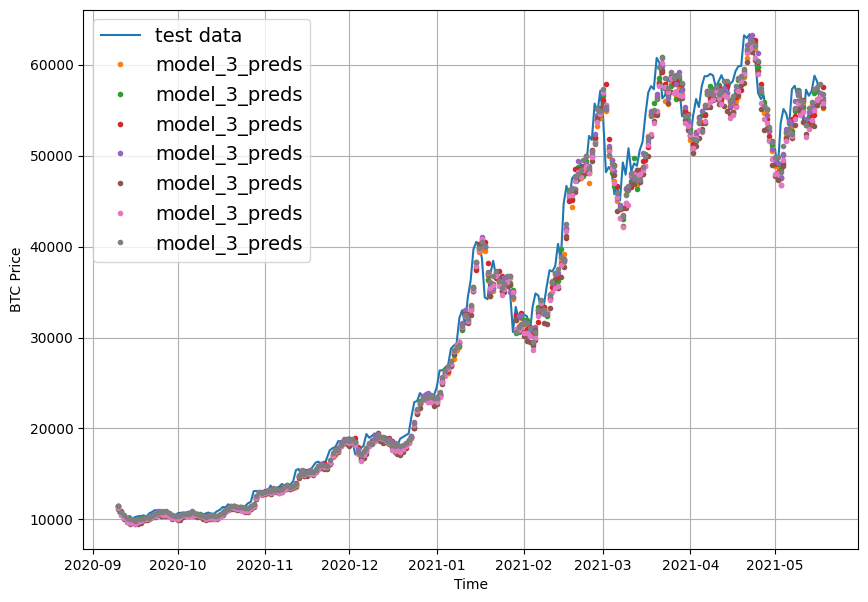

In [77]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0],format="-", start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = model_3_preds, start=offset, label="model_3_preds")

In [78]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9139.598, 9172.509, 9215.921, 9039.749, 9005.554, 9140.742,
       9413.55 ], dtype=float32)>

In [79]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9161.089>

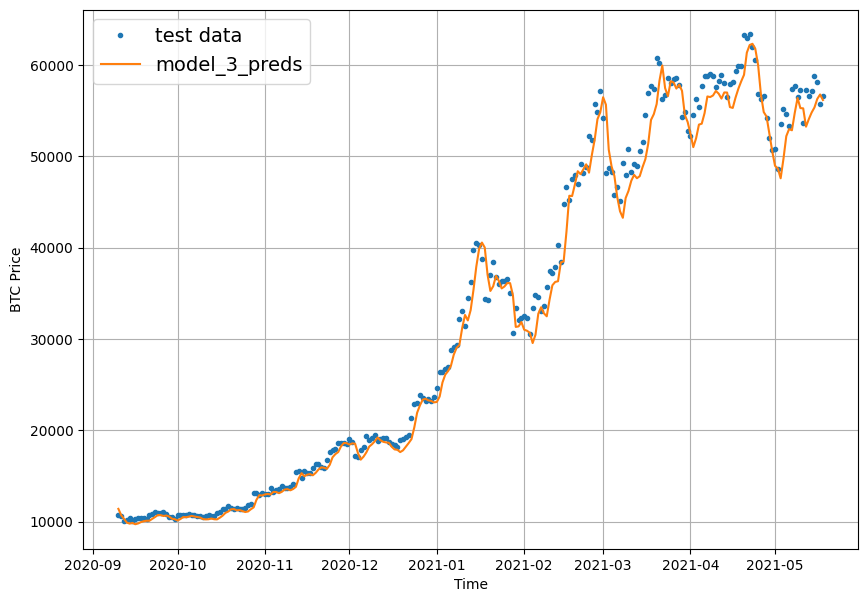

In [80]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values = test_labels[:,0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

In [81]:
naive_results.values()

dict_values([567.9802, 2.5165248, 0.99957, 1147547.0, 1071.2362])

## Which of our models is performing the best so far?
So we've trained a few models, now let's compare them and see how they've gone...

<Axes: >

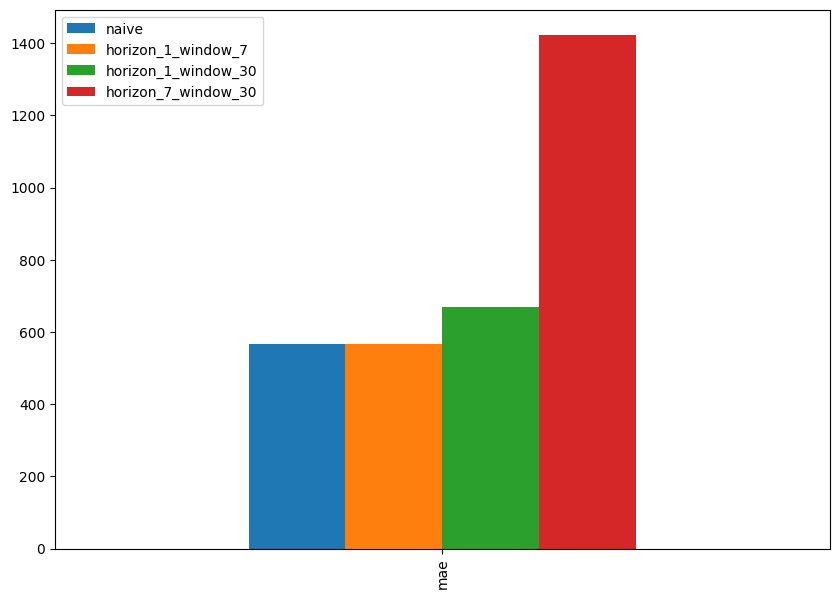

In [82]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

In [83]:

# import matplotlib.pyplot as plt

# plt.plot(list(naive_results.keys()), list(naive_results.values()), marker='o', label='naive_results')
# plt.plot(list(model_2_results.keys()), list(model_2_results.values()), marker='o', label='model_2_results')
# plt.plot(list(model_3_results.keys()), list(model_3_results.values()), marker='o', label='model_3_results')

# plt.legend()
# plt.show()


Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current
timestep). In other words, today's value is probably pretty close to yesterday's value. Of course,
this isn't always the case but when it is, a naïve model will often get fairly good results.

**Resource:** For more on how autocorrelation influences a model's predictions, see the article[How (not) to use Machine Learning for time series forecasting: avoiding the pitfalls by Vegard Flovik.](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4 : Conv1D 


In [84]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)


# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of : `batch, timesteps, input_dim`...

However our data isn't in that shape yet

In [85]:
# Check data input shape
train_windows[0].shape

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x 

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)) # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1

In [88]:
# Test out our lambda layer
print(f"original shape: {x.shape}") # (WINDOW_SIZE)
print(f"expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

original shape: (7,)
expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [89]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
input_shape = train_windows.shape[1:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding="causal", activation="relu"), # Add a Flatten layer to collapse the spatial dimensions
    tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
], name="model_4") # name our model so we can save it 

# 2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()) 
# 3. Fit the model
history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_4.name)]);

In [90]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 578.8000


578.7999877929688

In [92]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 578.8000


578.7999877929688

In [93]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds.shape

18/18 [==============================] - 0s 2ms/step


TensorShape([556])

In [94]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 578.8,
 'mape': 2.6026669,
 'mase': 1.0167912,
 'mse': 1219316.4,
 'rmse': 1104.2266}

<Axes: >

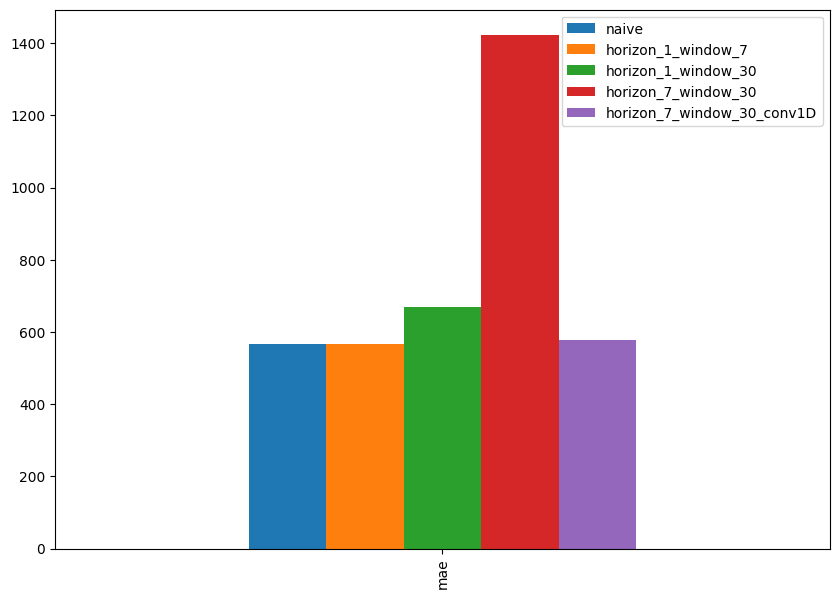

In [95]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_7_window_30_conv1D": model_4_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

## model 4 :  Conv1D With using KERAS TUNER 

In [96]:
#!pip install keras-tuner==1.0.4

In [97]:
# # function 
# import tensorflow as tf
# from kerastuner import RandomSearch

# def build_model_4_op(hp):
#     model_4_op = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
#         tf.keras.layers.Conv1D(
#             filters=hp.Int('filters', min_value=32, max_value=256, step=32),
#             kernel_size=hp.Choice('kernel_size', values=[3, 5]),
#             strides=1,
#             padding="causal",
#             activation="relu"
#         ),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(HORIZON)
#     ], name="model_4_op")

#     model_4_op.compile(loss="mae",
#                        optimizer=tf.keras.optimizers.Adam(
#                            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                            ),
#                        metrics=["mae", "mse"])

#     return model_4_op

# tuner = RandomSearch(
#     build_model_4_op,
#     objective='mae',
#     max_trials=20,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='build_model_4_op')

# tuner.search_space_summary()

In [98]:
# tuner.search(train_windows, train_labels, epochs=100, verbose=1, batch_size=128, validation_data=(test_windows, test_labels))

In [99]:
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
# final_model_4_op = build_model_4_op(best_hp)

In [100]:
# #input_shape = (train_windows.shape[1])
# final_model_4_op.build(train_windows.shape)
# final_model_4_op.summary()

In [101]:
# history_model_4_op = final_model_4_op.fit(train_windows,
#                                           train_labels,
#                                           epochs=100,
#                                           verbose=0,
#                                           batch_size=128,
#                                           validation_data=(test_windows, test_labels),
#                                           callbacks=[create_model_checkpoint(model_name=final_model_4_op.name)])

In [102]:
# final_model_4_op.evaluate(test_windows, test_labels)

In [103]:
# # function
# # Import pandas
# import pandas as pd

# # Obtenir les meilleurs modèles
# best_models = tuner.get_best_models(num_models=20)  # Vous pouvez modifier num_models pour récupérer le nombre de meilleurs modèles que vous souhaitez

# # Créer une liste vide pour stocker les paramètres et les scores
# hyperparameters_scores_list = []

# # Parcourir les trials et ajouter les hyperparamètres et les scores correspondants à la liste
# for trial in tuner.oracle.trials.values():
#     hyperparameters = trial.hyperparameters.values
#     val_loss_mae = trial.score
#     mae = trial.metrics.metrics["loss"].get_best_value()

#     hyperparameters_scores = {
#         'filters': hyperparameters['filters'],
#         'kernel_size': hyperparameters['kernel_size'],
#         'learning_rate': hyperparameters['learning_rate'],
#         'val_loss': val_loss_mae,
#         'mae': mae
#     }
#     hyperparameters_scores_list.append(hyperparameters_scores)

# # Convertir la liste en DataFrame pandas
# hyperparameters_scores_df = pd.DataFrame(hyperparameters_scores_list)

# # Trier le DataFrame en fonction de val_loss et sélectionner les meilleurs modèles
# hyperparameters_scores_df = hyperparameters_scores_df.sort_values(by='mae', ascending=False).head(len(best_models));

# # Réinitialiser l'index du DataFrame
# hyperparameters_scores_df.reset_index(drop=True, inplace=True);

In [104]:
# hyperparameters_scores_df

In [105]:
# model_4_op_preds = make_preds(final_model_4_op,test_windows)

In [106]:
# model_4_op_results = evaluate_preds(test_labels,model_4_op_preds)
# model_4_op_results

## Model 5 : RNN (LSTM)

In [107]:
HORIZON = 1
WINDOW_SIZE = 7

# Make windowe data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)
len(full_windows), len(full_labels), len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2780, 2780, 2224, 556, 2224, 556)

In [108]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
input_shape = train_windows.shape[1:]

model_5 = tf.keras.Sequential([
    # Vous pouvez ajuster le nombre d'unités LSTM et le retour de séquences en fonction de votre modèle.
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # add an extra dimension for `input_dim` in the end of the tensor  with -1 and on position 1 with axis=1
    # tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, activation="relu"),
    # tf.keras.layers.LSTM(32, activation="relu"),
    tf.keras.layers.Dense(HORIZON) # linear activation is the same as having no activation
], name="model_5_LSTM") # name our model so we can save it 

# 2. Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()) 
# 3. Fit the model
history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows,test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_5.name)]);

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2677.0923

18/18 [==============================] - 5s 150ms/step - loss: 2666.6045 - val_loss: 14313.0381
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 1983.1361

18/18 [==============================] - 3s 157ms/step - loss: 1738.9707 - val_loss: 6314.3882
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 478.8002

18/18 [==============================] - 2s 130ms/step - loss: 460.0083 - val_loss: 1527.5363
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 215.3042

18/18 [==============================] - 3s 147ms/step - loss: 213.3050 - val_loss: 1117.6614
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 174.5822

18/18 [==============================] - 3s 163ms/step - loss: 168.1479 - val_loss: 959.0760
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 163.3635

18/18 [==============================] - 3s 161ms/step - loss: 163.3635 - val_loss: 891.9839
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 163.3771 - val_loss: 908.0050
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 162.8090 - val_loss: 924.0251
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 161.0916 - val_loss: 923.0547
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 160.2520 - val_loss: 898.0764
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 160.6527 - val_loss: 895.9199
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 159.0350

18/18 [==============================] - 2s 128ms/step - loss: 159.4206 - val_loss: 852.1630
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 156.9596 - val_loss: 897.3414
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 156.8960 - val_loss: 931.3226
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 155.9200 - val_loss: 891.5380
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 153.6526 - val_loss: 859.1752
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 152.5041 - val_loss: 928.0925
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 153.3449 - val_loss: 905.1385
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 151.3694 - val_loss: 928.0750
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 151.2458

18/18 [==============================] - 3s 150ms/step - loss: 151.6810 - val_loss: 843.7818
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 145.5645

18/18 [==============================] - 3s 162ms/step - loss: 146.8337 - val_loss: 824.9742
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 153.8297

18/18 [==============================] - 3s 162ms/step - loss: 148.3490 - val_loss: 817.4250
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 147.2978 - val_loss: 834.9320
Epoch 24/100
18/18 [==============================] - 0s 10ms/step - loss: 144.7061 - val_loss: 844.2324
Epoch 25/100
18/18 [==============================] - 0s 10ms/step - loss: 143.4158 - val_loss: 824.1776
Epoch 26/100
18/18 [==============================] - 0s 9ms/step - loss: 142.7165 - val_loss: 821.1332
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 139.8444

18/18 [==============================] - 2s 131ms/step - loss: 140.5320 - val_loss: 800.9639
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 139.6832

18/18 [==============================] - 2s 130ms/step - loss: 139.6838 - val_loss: 776.0051
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 139.6553 - val_loss: 800.6912
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 136.8158

18/18 [==============================] - 3s 158ms/step - loss: 139.9269 - val_loss: 773.6044
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 136.5817

18/18 [==============================] - 3s 147ms/step - loss: 136.5084 - val_loss: 755.7651
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 135.4412 - val_loss: 756.4598
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 136.9562 - val_loss: 839.9166
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 136.1439

18/18 [==============================] - 3s 170ms/step - loss: 136.1439 - val_loss: 740.2129
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 132.2420

18/18 [==============================] - 2s 130ms/step - loss: 132.8022 - val_loss: 738.4167
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 127.9470

18/18 [==============================] - 2s 135ms/step - loss: 132.3801 - val_loss: 731.2392
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 132.2214 - val_loss: 743.7589
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 130.3515

18/18 [==============================] - 3s 174ms/step - loss: 130.3515 - val_loss: 714.5093
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 131.4733

18/18 [==============================] - 2s 130ms/step - loss: 129.3371 - val_loss: 711.4395
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6712 - val_loss: 719.1215
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 128.0095

18/18 [==============================] - 3s 180ms/step - loss: 126.9641 - val_loss: 697.8553
Epoch 42/100
13/18 [====================>.........] - ETA: 0s - loss: 125.3539

18/18 [==============================] - 2s 138ms/step - loss: 126.0137 - val_loss: 697.2856
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 126.0161 - val_loss: 701.2241
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 117.0807

18/18 [==============================] - 2s 139ms/step - loss: 123.9097 - val_loss: 682.9056
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 120.9377

18/18 [==============================] - 3s 170ms/step - loss: 123.5136 - val_loss: 678.2795
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 123.6668 - val_loss: 693.4974
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 123.5353 - val_loss: 681.2373
Epoch 48/100
 9/18 [==============>...............] - ETA: 0s - loss: 119.5500

18/18 [==============================] - 2s 129ms/step - loss: 121.4197 - val_loss: 676.2519
Epoch 49/100
10/18 [===============>..............] - ETA: 0s - loss: 130.3077

18/18 [==============================] - 3s 168ms/step - loss: 121.4268 - val_loss: 674.5666
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 123.8578 - val_loss: 701.6525
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9233 - val_loss: 753.0893
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 129.4339

18/18 [==============================] - 2s 129ms/step - loss: 124.7868 - val_loss: 664.6192
Epoch 53/100
15/18 [========================>.....] - ETA: 0s - loss: 121.8908

18/18 [==============================] - 3s 159ms/step - loss: 121.6296 - val_loss: 657.7112
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 120.1055

18/18 [==============================] - 3s 153ms/step - loss: 120.1055 - val_loss: 650.9453
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 118.6864 - val_loss: 654.2940
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 120.6073

18/18 [==============================] - 3s 171ms/step - loss: 119.0777 - val_loss: 646.9263
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 120.1384 - val_loss: 666.8993
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 117.4952

18/18 [==============================] - 2s 131ms/step - loss: 117.6780 - val_loss: 634.9737
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 116.2651

18/18 [==============================] - 2s 132ms/step - loss: 116.5126 - val_loss: 632.7051
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 116.3795 - val_loss: 642.6552
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 116.8009 - val_loss: 662.1719
Epoch 62/100
18/18 [==============================] - 0s 11ms/step - loss: 120.2258 - val_loss: 700.5214
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 119.6426 - val_loss: 637.8379
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 115.7827 - val_loss: 663.2373
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 119.1093

18/18 [==============================] - 3s 171ms/step - loss: 118.3974 - val_loss: 629.4782
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 117.3761 - val_loss: 654.3414
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 117.4156

18/18 [==============================] - 2s 126ms/step - loss: 116.7839 - val_loss: 620.2012
Epoch 68/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8589 - val_loss: 626.2648
Epoch 69/100
10/18 [===============>..............] - ETA: 0s - loss: 125.5252

18/18 [==============================] - 3s 174ms/step - loss: 119.2503 - val_loss: 617.9912
Epoch 70/100
18/18 [==============================] - 0s 11ms/step - loss: 114.2598 - val_loss: 618.4336
Epoch 71/100
18/18 [==============================] - 0s 16ms/step - loss: 115.6370 - val_loss: 656.2129
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 119.3176 - val_loss: 634.6066
Epoch 73/100
16/18 [=========================>....] - ETA: 0s - loss: 115.9210

18/18 [==============================] - 2s 133ms/step - loss: 115.4366 - val_loss: 616.3127
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 114.9544 - val_loss: 639.0291
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7578 - val_loss: 635.2654
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 114.0168

18/18 [==============================] - 3s 163ms/step - loss: 114.0168 - val_loss: 610.9014
Epoch 77/100
18/18 [==============================] - 0s 14ms/step - loss: 115.6993 - val_loss: 660.3661
Epoch 78/100
18/18 [==============================] - 0s 14ms/step - loss: 116.6023 - val_loss: 620.0891
Epoch 79/100
18/18 [==============================] - ETA: 0s - loss: 113.2424

18/18 [==============================] - 2s 135ms/step - loss: 113.2424 - val_loss: 606.7050
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6697 - val_loss: 619.0358
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1304 - val_loss: 635.1489
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 116.1747 - val_loss: 623.7283
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 113.3896 - val_loss: 642.4759
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 117.0221 - val_loss: 639.8606
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6939 - val_loss: 607.4656
Epoch 86/100
18/18 [==============================] - ETA: 0s - loss: 114.2890

18/18 [==============================] - 2s 126ms/step - loss: 114.2890 - val_loss: 604.5350
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 112.4726

18/18 [==============================] - 3s 166ms/step - loss: 111.9246 - val_loss: 598.9466
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8439 - val_loss: 601.9252
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7641 - val_loss: 648.6573
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 118.5795 - val_loss: 607.9969
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7153 - val_loss: 632.4179
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8608 - val_loss: 606.6005
Epoch 93/100
17/18 [===========================>..] - ETA: 0s - loss: 112.7818

18/18 [==============================] - 3s 165ms/step - loss: 112.2177 - val_loss: 596.2063
Epoch 94/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7097

18/18 [==============================] - 2s 143ms/step - loss: 111.0554 - val_loss: 596.2009
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1232 - val_loss: 603.0514
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 112.6994 - val_loss: 604.7673
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 119.1195 - val_loss: 617.8575
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 115.0630 - val_loss: 600.0326
Epoch 99/100
18/18 [==============================] - 0s 9ms/step - loss: 113.1840 - val_loss: 611.9686
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 116.1368 - val_loss: 601.4813


In [109]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.2009


596.200927734375

In [110]:
# Make prediction our LSTM model
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 3ms/step


In [111]:
model_5_results = evaluate_preds(test_labels, model_5_preds)

<Axes: >

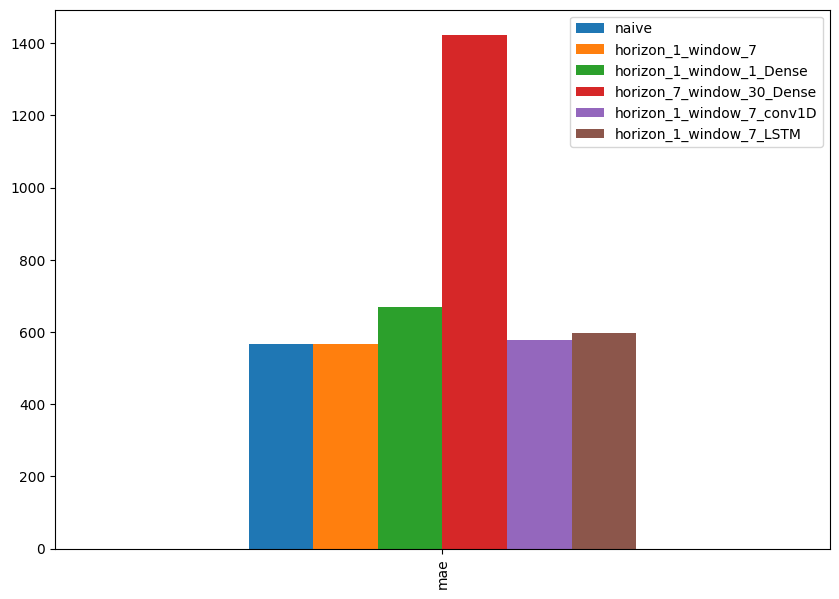

In [112]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_1_Dense": model_2_results["mae"],
              "horizon_7_window_30_Dense": model_3_results["mae"],
              "horizon_1_window_7_conv1D": model_4_results["mae"],
              "horizon_1_window_7_LSTM":model_5_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue into this now.

## Model 5 : RNN (LSTM)  with using KERAS TUNER

In [113]:
# import tensorflow as tf
# from kerastuner import RandomSearch

# # Set random seed for as reproducible results as possible
# tf.random.set_seed(42)
# input_shape = train_windows.shape[1:]
# # Define the model building function
# def build_model(hp):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=input_shape),
#         tf.keras.layers.LSTM(hp.Int('units_1', min_value=64, max_value=256, step=32), return_sequences=True),
#         tf.keras.layers.LSTM(hp.Int('units_2', min_value=64, max_value=256, step=32)),
#         tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=128, step=16), activation="relu"),
#         tf.keras.layers.Dense(HORIZON)
#     ])

#     model.compile(loss="mae",
#                   optimizer=tf.keras.optimizers.Adam(
#                       hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#                   ))
#     return model

# # Configure the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=30,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='model_5_LSTM'
# )


In [114]:
# # Search for the best hyperparameters
# tuner.search(train_windows, train_labels,
#              epochs=100,
#              verbose=1,
#              batch_size=128,
#              validation_data=(test_windows, test_labels),
#              callbacks=[create_model_checkpoint(model_name='model_5_LSTM')])

In [115]:

# # Get the best hyperparameters
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the best model
# best_model = build_model(best_hp)

# # Fit the best model
# history_best_model = best_model.fit(train_windows,
#                                     train_labels,
#                                     epochs=100,
#                                     verbose=1,
#                                     batch_size=128,
#                                     validation_data=(test_windows, test_labels),
#                                     callbacks=[create_model_checkpoint(model_name='best_model')])

## Make a multivariate time series time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted o that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

what's a better feature to use?

How about the bitcoin halving events ?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

on rajoute les date d'evenement qui ont influencé le cours et les meme date a venir pour que notre model les prenent en compte

In [116]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data it starts from 01 October 2013)
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Black reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [118]:
# create date ranges of where specific block_reward values should be
bitcoin_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
bitcoin_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
#bitcoin_reward_2_days, bitcoin_reward_3_days
block_reward_3_datetime - bitcoin_prices.index[0], block_reward_3_datetime, bitcoin_prices.index[0]

(Timedelta('1012 days 00:00:00'),
 numpy.datetime64('2016-07-09'),
 Timestamp('2013-10-01 00:00:00'))

In [119]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:bitcoin_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[bitcoin_reward_2_days:bitcoin_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[bitcoin_reward_3_days:,-1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


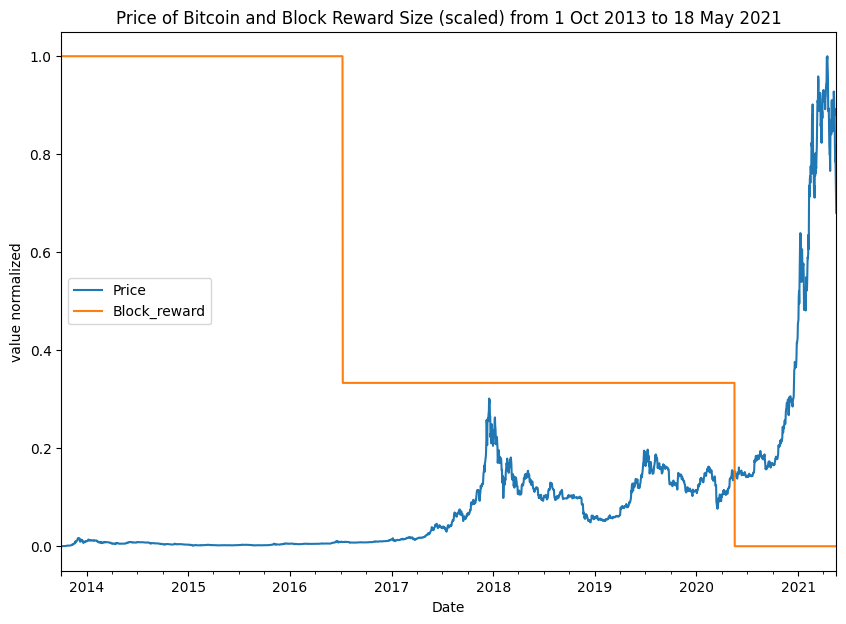

In [120]:
# plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))
plt.title("Price of Bitcoin and Block Reward Size (scaled) from 1 Oct 2013 to 18 May 2021")
plt.xlabel("Date")
plt.ylabel("value normalized")
plt.legend(["Price", "Block_reward"])
plt.show()

## Making a windowed dataset with pandas
 Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

In [121]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [122]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0,1,2,3,4,5,6, block_reward] -> [7]
[1,2,3,4,5,6,7, block_reward] -> [8]
[2,3,4,5,6,7,8, block_reward] -> [9]
```

In [123]:
bitcoin_prices_windowed.dropna().head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
2013-10-13,126.38333,25,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
2013-10-14,135.24199,25,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500
2013-10-15,133.20333,25,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300
2013-10-16,142.76333,25,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900


In [124]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [125]:
# Make train and test sets using indexing
split_size= int(len(x)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
X_train

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


### train_test_split with timeSeriesSplit (time series cross validation)

In [126]:
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# len(X_train), len(y_train), len(X_test), len(y_test)

## Model 6 : Dense (multivariate time series)

In [127]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)


num_features = X.shape[1] 
# Construct model
model_6 = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
], name="model_6") # name our model so we can save it 

# 2. Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_model_6 = model_6.fit(X_train,
                              y_train,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(X_test,y_test),
                              callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 140.9155

1/1 [==============================] - 2s 2s/step - loss: 140.9155 - val_loss: 6153.4009
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 119.7156

1/1 [==============================] - 2s 2s/step - loss: 119.7156 - val_loss: 5115.3735
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 99.8051

1/1 [==============================] - 1s 816ms/step - loss: 99.8051 - val_loss: 4099.7915
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 80.3562

1/1 [==============================] - 1s 772ms/step - loss: 80.3562 - val_loss: 3077.9412
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 60.9294

1/1 [==============================] - 1s 784ms/step - loss: 60.9294 - val_loss: 2046.2222
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 41.3055

1/1 [==============================] - 1s 773ms/step - loss: 41.3055 - val_loss: 1028.9626
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 21.5240

1/1 [==============================] - 1s 756ms/step - loss: 21.5240 - val_loss: 356.3242
Epoch 8/100
1/1 [==============================] - 0s 73ms/step - loss: 2.5220 - val_loss: 975.5051
Epoch 9/100
1/1 [==============================] - 0s 67ms/step - loss: 16.0622 - val_loss: 1582.3774
Epoch 10/100
1/1 [==============================] - 0s 98ms/step - loss: 27.9836 - val_loss: 1930.8561
Epoch 11/100
1/1 [==============================] - 0s 100ms/step - loss: 34.7921 - val_loss: 2069.5029
Epoch 12/100
1/1 [==============================] - 0s 107ms/step - loss: 37.5435 - val_loss: 2044.4227
Epoch 13/100
1/1 [==============================] - 0s 87ms/step - loss: 37.0918 - val_loss: 1888.8629
Epoch 14/100
1/1 [==============================] - 0s 109ms/step - loss: 34.0570 - val_loss: 1626.7932
Epoch 15/100
1/1 [==============================] - 0s 106ms/step - loss: 28.9306 - val_loss: 1276.8467
Epoch 16/100
1/1 [==============================] - 0s 122ms/step - loss: 22.1374 - va

1/1 [==============================] - 1s 865ms/step - loss: 1.9820 - val_loss: 356.3037
Epoch 54/100
1/1 [==============================] - 0s 109ms/step - loss: 1.9725 - val_loss: 366.0957
Epoch 55/100
1/1 [==============================] - 0s 76ms/step - loss: 1.2023 - val_loss: 382.7558
Epoch 56/100
1/1 [==============================] - 0s 75ms/step - loss: 1.6360 - val_loss: 383.2439
Epoch 57/100
1/1 [==============================] - 0s 98ms/step - loss: 1.6488 - val_loss: 368.1794
Epoch 58/100
1/1 [==============================] - 0s 69ms/step - loss: 1.2342 - val_loss: 357.3424
Epoch 59/100
1/1 [==============================] - 0s 84ms/step - loss: 1.3825 - val_loss: 360.9606
Epoch 60/100
1/1 [==============================] - 0s 69ms/step - loss: 1.1577 - val_loss: 369.8622
Epoch 61/100
1/1 [==============================] - 0s 89ms/step - loss: 1.2535 - val_loss: 375.3860
Epoch 62/100
1/1 [==============================] - 0s 100ms/step - loss: 1.3387 - val_loss: 366.2623


In [128]:
model_6.evaluate(X_test,y_test)

87/87 [==============================] - 0s 2ms/step - loss: 371.7991


371.79913330078125

In [129]:
# load best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6")
model_6.evaluate(X_test,y_test)

87/87 [==============================] - 0s 2ms/step - loss: 356.3037


356.3037109375

In [130]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

87/87 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([125.725296, 126.50846 , 128.40518 , 130.00694 , 132.78609 ,
       134.79314 , 137.58345 , 140.29466 , 146.63887 , 149.61258 ],
      dtype=float32)>

In [131]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 356.3037,
 'mape': 4.874506,
 'mase': 1.7949188,
 'mse': 861454.0,
 'rmse': 928.14545}

### Model 6 : with multi-inputs

In [132]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

num_price_features = X.shape[1]-1 
# Define the input layers for the historical price and block_reward
input_price = tf.keras.layers.Input(shape=(num_price_features,), name="input_price")
input_block_reward = tf.keras.layers.Input(shape=(1,), name="input_block_reward")

# Define separate hidden layers for each input
hidden_price = tf.keras.layers.Dense(128, activation="relu")(input_price)
hidden_block_reward = tf.keras.layers.Dense(32, activation="relu")(input_block_reward)

# Concatenate the hidden layers
concatenated = tf.keras.layers.concatenate([hidden_price, hidden_block_reward])

# Define the output layer
output = tf.keras.layers.Dense(HORIZON, activation="linear", name="output")(concatenated)

# Create the model
model_6 = tf.keras.Model(inputs=[input_price, input_block_reward], outputs=output, name="model_6_multi_input")

# 2. Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

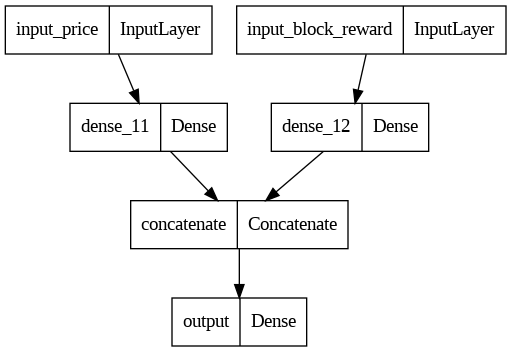

In [133]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_6)

In [134]:
X_train_price = X_train.drop(columns=["block_reward"]).values
X_train_block_reward = X_train["block_reward"].values.reshape(-1, 1)
X_test_price = X_test.drop(columns=["block_reward"]).values
X_test_block_reward = X_test["block_reward"].values.reshape(-1, 1)

# Train the model with multi-inputs
history = model_6.fit([X_train_price, X_train_block_reward], y_train,
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    validation_data=([X_test_price, X_test_block_reward], y_test),
                    callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 82.1680

1/1 [==============================] - 2s 2s/step - loss: 82.1680 - val_loss: 4023.8940
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 75.5017

1/1 [==============================] - 1s 926ms/step - loss: 75.5017 - val_loss: 3671.8242
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 68.8564

1/1 [==============================] - 1s 1s/step - loss: 68.8564 - val_loss: 3320.5898
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 62.2237

1/1 [==============================] - 1s 1s/step - loss: 62.2237 - val_loss: 2969.3223
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 55.5922

1/1 [==============================] - 1s 1s/step - loss: 55.5922 - val_loss: 2617.8184
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 48.9447

1/1 [==============================] - 1s 857ms/step - loss: 48.9447 - val_loss: 2266.3840
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 42.2889

1/1 [==============================] - 1s 1s/step - loss: 42.2889 - val_loss: 1915.0631
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 35.6324

1/1 [==============================] - 1s 898ms/step - loss: 35.6324 - val_loss: 1564.1687
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 28.9633

1/1 [==============================] - 1s 874ms/step - loss: 28.9633 - val_loss: 1214.4170
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 22.3051

1/1 [==============================] - 1s 980ms/step - loss: 22.3051 - val_loss: 871.4634
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 15.6100

1/1 [==============================] - 1s 855ms/step - loss: 15.6100 - val_loss: 566.7742
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 8.9024

1/1 [==============================] - 1s 819ms/step - loss: 8.9024 - val_loss: 364.2606
Epoch 13/100
1/1 [==============================] - 0s 103ms/step - loss: 2.1858 - val_loss: 393.0015
Epoch 14/100
1/1 [==============================] - 0s 101ms/step - loss: 4.5466 - val_loss: 548.3204
Epoch 15/100
1/1 [==============================] - 0s 97ms/step - loss: 9.4402 - val_loss: 692.0670
Epoch 16/100
1/1 [==============================] - 0s 73ms/step - loss: 12.8187 - val_loss: 790.1179
Epoch 17/100
1/1 [==============================] - 0s 71ms/step - loss: 14.9190 - val_loss: 839.5960
Epoch 18/100
1/1 [==============================] - 0s 98ms/step - loss: 15.9296 - val_loss: 843.7647
Epoch 19/100
1/1 [==============================] - 0s 106ms/step - loss: 16.0046 - val_loss: 808.9518
Epoch 20/100
1/1 [==============================] - 0s 109ms/step - loss: 15.2786 - val_loss: 742.9216
Epoch 21/100
1/1 [==============================] - 0s 108ms/step - loss: 13.8664 - val_loss: 

1/1 [==============================] - 1s 887ms/step - loss: 3.0841 - val_loss: 348.1531
Epoch 26/100
1/1 [==============================] - 0s 104ms/step - loss: 1.1963 - val_loss: 406.8473
Epoch 27/100
1/1 [==============================] - 0s 100ms/step - loss: 4.0149 - val_loss: 475.5154
Epoch 28/100
1/1 [==============================] - 0s 99ms/step - loss: 6.3906 - val_loss: 524.1896
Epoch 29/100
1/1 [==============================] - 0s 65ms/step - loss: 7.8235 - val_loss: 546.3267
Epoch 30/100
1/1 [==============================] - 0s 100ms/step - loss: 8.4255 - val_loss: 541.5051
Epoch 31/100
1/1 [==============================] - 0s 102ms/step - loss: 8.2917 - val_loss: 513.3846
Epoch 32/100
1/1 [==============================] - 0s 74ms/step - loss: 7.5057 - val_loss: 468.0149
Epoch 33/100
1/1 [==============================] - 0s 79ms/step - loss: 6.1392 - val_loss: 413.3950
Epoch 34/100
1/1 [==============================] - 0s 138ms/step - loss: 4.2502 - val_loss: 363.41

1/1 [==============================] - 1s 1s/step - loss: 1.8907 - val_loss: 345.4072
Epoch 36/100
1/1 [==============================] - 0s 132ms/step - loss: 1.4937 - val_loss: 372.8936
Epoch 37/100
1/1 [==============================] - 0s 115ms/step - loss: 3.2831 - val_loss: 404.0941
Epoch 38/100
1/1 [==============================] - 0s 116ms/step - loss: 4.7558 - val_loss: 420.3628
Epoch 39/100
1/1 [==============================] - 0s 93ms/step - loss: 5.4046 - val_loss: 418.0226
Epoch 40/100
1/1 [==============================] - 0s 112ms/step - loss: 5.3161 - val_loss: 399.5104
Epoch 41/100
1/1 [==============================] - 0s 95ms/step - loss: 4.5685 - val_loss: 371.7633
Epoch 42/100
1/1 [==============================] - 0s 103ms/step - loss: 3.2335 - val_loss: 347.6388
Epoch 43/100
1/1 [==============================] - 0s 114ms/step - loss: 1.5998 - val_loss: 346.9100
Epoch 44/100
1/1 [==============================] - 0s 111ms/step - loss: 1.2194 - val_loss: 369.042

1/1 [==============================] - 1s 850ms/step - loss: 1.7642 - val_loss: 345.2748
Epoch 50/100
1/1 [==============================] - 0s 72ms/step - loss: 1.2884 - val_loss: 346.7252
Epoch 51/100
1/1 [==============================] - 0s 63ms/step - loss: 1.5730 - val_loss: 357.1022
Epoch 52/100
1/1 [==============================] - 0s 62ms/step - loss: 2.3571 - val_loss: 361.7831
Epoch 53/100
1/1 [==============================] - 0s 99ms/step - loss: 2.6698 - val_loss: 355.9362
Epoch 54/100
1/1 [==============================] - 0s 71ms/step - loss: 2.2753 - val_loss: 346.6015
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 1.5698

1/1 [==============================] - 1s 822ms/step - loss: 1.5698 - val_loss: 344.3212
Epoch 56/100
1/1 [==============================] - 0s 66ms/step - loss: 1.3456 - val_loss: 350.4977
Epoch 57/100
1/1 [==============================] - 0s 65ms/step - loss: 1.1126 - val_loss: 366.4744
Epoch 58/100
1/1 [==============================] - 0s 100ms/step - loss: 2.0923 - val_loss: 372.6925
Epoch 59/100
1/1 [==============================] - 0s 106ms/step - loss: 2.4444 - val_loss: 366.2476
Epoch 60/100
1/1 [==============================] - 0s 69ms/step - loss: 2.0798 - val_loss: 351.7720
Epoch 61/100
1/1 [==============================] - 0s 67ms/step - loss: 1.1036 - val_loss: 344.7822
Epoch 62/100
1/1 [==============================] - 0s 64ms/step - loss: 1.3014 - val_loss: 344.3870
Epoch 63/100
1/1 [==============================] - 0s 99ms/step - loss: 1.4694 - val_loss: 347.1973
Epoch 64/100
1/1 [==============================] - 0s 97ms/step - loss: 1.5912 - val_loss: 350.1642


1/1 [==============================] - 1s 805ms/step - loss: 1.4955 - val_loss: 343.7571
Epoch 68/100
1/1 [==============================] - 0s 96ms/step - loss: 1.3740 - val_loss: 345.8541
Epoch 69/100
1/1 [==============================] - 0s 100ms/step - loss: 1.2326 - val_loss: 351.7263
Epoch 70/100
1/1 [==============================] - 0s 98ms/step - loss: 1.1048 - val_loss: 354.7916
Epoch 71/100
1/1 [==============================] - 0s 97ms/step - loss: 1.3409 - val_loss: 349.3676
Epoch 72/100
1/1 [==============================] - 0s 99ms/step - loss: 1.1201 - val_loss: 347.0825
Epoch 73/100
1/1 [==============================] - 0s 102ms/step - loss: 1.1803 - val_loss: 346.3670
Epoch 74/100
1/1 [==============================] - 0s 63ms/step - loss: 1.2029 - val_loss: 346.6411
Epoch 75/100
1/1 [==============================] - 0s 98ms/step - loss: 1.1911 - val_loss: 347.9692
Epoch 76/100
1/1 [==============================] - 0s 103ms/step - loss: 1.1480 - val_loss: 351.0302

1/1 [==============================] - 1s 863ms/step - loss: 1.1976 - val_loss: 343.4332
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 1.2985

1/1 [==============================] - 1s 835ms/step - loss: 1.2985 - val_loss: 342.8249
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 1.3551

1/1 [==============================] - 1s 1s/step - loss: 1.3551 - val_loss: 342.7700
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 1.3716

1/1 [==============================] - 1s 1s/step - loss: 1.3716 - val_loss: 342.7306
Epoch 92/100
1/1 [==============================] - 0s 136ms/step - loss: 1.3516 - val_loss: 343.1768
Epoch 93/100
1/1 [==============================] - 0s 140ms/step - loss: 1.2983 - val_loss: 344.6196
Epoch 94/100
1/1 [==============================] - 0s 112ms/step - loss: 1.2147 - val_loss: 348.0408
Epoch 95/100
1/1 [==============================] - 0s 112ms/step - loss: 1.1037 - val_loss: 355.3580
Epoch 96/100
1/1 [==============================] - 0s 137ms/step - loss: 1.4337 - val_loss: 352.2363
Epoch 97/100
1/1 [==============================] - 0s 95ms/step - loss: 1.2007 - val_loss: 344.0791
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 1.2261

1/1 [==============================] - 1s 1s/step - loss: 1.2261 - val_loss: 342.4243
Epoch 99/100
1/1 [==============================] - 0s 96ms/step - loss: 1.3816 - val_loss: 343.7766
Epoch 100/100
1/1 [==============================] - 0s 113ms/step - loss: 1.4865 - val_loss: 345.3331


In [135]:
model_6_multi_inputs = tf.keras.models.load_model("/content/model_experiments/model_6_multi_input/")

In [136]:
model_6_multi_inputs.evaluate([X_test_price, X_test_block_reward], y_test)

87/87 [==============================] - 0s 2ms/step - loss: 342.4243


342.42425537109375

In [137]:
y_preds = model_6_multi_inputs.predict([X_test_price, X_test_block_reward])

87/87 [==============================] - 0s 2ms/step


In [138]:
evaluate_preds(y_test, y_preds)

{'mae': 342.42426,
 'mape': 4.768444,
 'mase': 1.7249995,
 'mse': 795617.6,
 'rmse': 891.974}

## Model 7 : N-BEAST algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically we've going to be replicating the algorithm in the following paper : https://arxiv.org/pdf/1905.10437.pdf

Why ? 

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture.
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS bloc layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlowwe can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models?hl=fr 

In [139]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):  # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layers with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs

In [151]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
nummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                        theta_size = WINDOW_SIZE+HORIZON, # backcast+forecast
                                        horizon = HORIZON,
                                        n_neurons = 128,
                                        n_layers=4)

In [152]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect dense layer input requirement (ndim=)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [153]:
# pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = nummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.6948308   0.40929073 -1.077368    0.8550941   0.66697603  0.68542737
  0.88280874]
Forecast: 0.06771239638328552


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: steps in the tf. data guide:   

In [154]:
HORIZON = 1
WIDNOW_SIZE = 7

In [155]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [158]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [164]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [173]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

# Time to make our dataset performant using tf.data API
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [174]:
EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_Stacks = 30

INPUT_SIZE = WINDOW_SIZE + HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(8, 9)

### Getting ready for residual connections

Before we can craf our N-BEATS model, we need two layers for the residual connections (substract and add)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network#:~:text=A%20residual%20neural%20network%20(ResNet,deeper%20than%20previous%20neural%20networks.

and here : https://paperswithcode.com/method/resnet

In [177]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

# get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Substracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compilling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section.
5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks: 
  * Early stopping - because the model will be training for so long, we'll stop it early if it stops improving.
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [180]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_LAYERS,
                                 name="InitialBlock")
# 2. Create input to stacks
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

hello
CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 1.25 ms
